<a href="https://colab.research.google.com/github/Anya232536/EDA_WB/blob/main/WB_DA_Python_HW_Belenok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')


<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [ ]:
df = pd.read_csv('shopping_trends_updated.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


1. Процент мужчин и женщин, имеющих размеры L и XL, примерно равны

In [ ]:
gender_size = df.groupby(['Gender', 'Size']).count()['Customer ID']
total_customers_male = gender_size.get(('Male', 'L')) + gender_size.get(('Male', 'XL'))
total_customers_female = gender_size.get(('Female', 'L')) + gender_size.get(('Female', 'XL'))
print(f"Процент мужчин с размером одежды X и XL = {total_customers_male/len(df[df['Gender']=='Male'])*100}%")
print(f"Процент женщин с размером одежды X и XL = {total_customers_female/len(df[df['Gender']=='Female'])*100}%")

Процент мужчин с размером одежды X и XL = 38.12217194570135%
Процент женщин с размером одежды X и XL = 37.74038461538461%


2. Самые популярные цвета это оливковый, желтый и серебряный.Самые непопулярные цвета золотой, коричневый и белый.

In [ ]:
df['Color'].value_counts().head(3)

,count
Color,
Olive,177
Yellow,174
Silver,173


In [ ]:
df['Color'].value_counts().tail(3)

,count
Color,
White,142
Brown,141
Gold,138


3. Мужчины купили более чем в два раза платьев больше, чем женщины.

In [ ]:
print(f"Количество платьев, купленных женщинами, равно {len(df[(df['Gender']=='Female') & (df['Item Purchased']=='Dress')])}")
print(f"Количество платьев, купленных мужчинами, равно {len(df[(df['Gender']=='Male') & (df['Item Purchased']=='Dress')])}")

Колиество платьев, купленных женщинами, равно 52
Колиество платьев, купленных мужчинами, равно 114


4. Женщины в возрасте от 40 до 50 лет покупают больше, чем женщины в возрасте от 20 до 30 лет. С мужчинами ситуация другая: количество покупок, совершенных разными возрастными группами, одинаковое. При этом в данных возрастных группах мужчины покупают больше, чем женщины.

In [ ]:
print(f"Количество покупок, соврешенных женщинами от 20 до 30 лет {len(df[(df['Gender']=='Female') & (df['Age']>=20) & (df['Age']<=30)])}")
print(f"Количество покупок, соврешенных женщинами от 40 до 50 лет {len(df[(df['Gender']=='Female') & (df['Age']>=40) & (df['Age']<=50)])}")

print(f"Количество покупок, соврешенных мужчинами от 20 до 30 лет {len(df[(df['Gender']=='Male') & (df['Age']>=20) & (df['Age']<=30)])}")
print(f"Количество покупок, соврешенных мужчинами от 40 до 50 лет {len(df[(df['Gender']=='Male') & (df['Age']>=40) & (df['Age']<=50)])}")


Количество покупок, соврешенных женщинами от 20 до 30 лет 248
Количество покупок, соврешенных женщинами от 40 до 50 лет 281
Количество покупок, соврешенных мужчинами от 20 до 30 лет 551
Количество покупок, соврешенных мужчинами от 40 до 50 лет 541


5. Во все времена года покупают одинаковое количество товаров, при этом всегда больше всего покупают одежду, а меньше всего верхнуюю одежду. При этом теплой одежды (Брюки, Свитер) было куплено больше зимой, чем летом.

In [ ]:
df['Season'].value_counts(normalize=True)*100

,proportion
Season,
Spring,25.615385
Fall,25.000000
Winter,24.897436
Summer,24.487179


In [ ]:
season_category = df.groupby(['Season', 'Category']).count()['Customer ID']
season_category

Season  Category   
Fall    Accessories    324
        Clothing       427
        Footwear       136
        Outerwear       88
Spring  Accessories    301
        Clothing       454
        Footwear       163
        Outerwear       81
Summer  Accessories    312
        Clothing       408
        Footwear       160
        Outerwear       75
Winter  Accessories    303
        Clothing       448
        Footwear       140
        Outerwear       80
Name: Customer ID, dtype: int64

In [ ]:
print(f"Количество теплой одежды, купленной зимой {len(df[(df['Season']=='Winter') & ((df['Item Purchased']=='Pants') | (df['Item Purchased']=='Sweater') | (df['Item Purchased']=='Sweater'))])}")
print(f"Количество теплой одежды, купленной летом {len(df[(df['Season']=='Summer') & ((df['Item Purchased']=='Pants') | (df['Item Purchased']=='Sweater') | (df['Item Purchased']=='Sweater'))])}")

Количество теплой одежды, купленной зимой 93
Количество теплой одежды, купленной летом 78


6. У большинтва покупателей нет подписки. Среди тех покупателей, у кого подписка есть, самый популярный способ оплаты дебитовая карта, самый непопулярный - банковский перевод. Среди тех, у кого подписки нет, самый популярный способ оплаты наличные или PayPal, наименее популярный - дебитовая карта.

In [ ]:
status_payment = df.groupby(['Subscription Status', 'Payment Method']).count()['Customer ID']
status_payment

Subscription Status  Payment Method
No                   Bank Transfer     455
                     Cash              497
                     Credit Card       492
                     Debit Card        446
                     PayPal            497
                     Venmo             460
Yes                  Bank Transfer     157
                     Cash              173
                     Credit Card       179
                     Debit Card        190
                     PayPal            180
                     Venmo             174
Name: Customer ID, dtype: int64

7. Между возрастом и рейтингом отзывов нет корреляции.

In [ ]:
res, pvalue = sps.pearsonr(df['Age'], df['Review Rating'])
print(res, pvalue)

-0.021949148075933275 0.17054661545044403


8. Между возрастом и суммой покупки нет корреляции

In [ ]:
res, pvalue = sps.pearsonr(df['Age'], df['Previous Purchases'])
print(res, pvalue)

0.040444531142894626 0.01153747377019881


<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

1. Самый популярный товар блюзка, ювелирные украшения и штаны.

In [ ]:
df['Item Purchased'].value_counts().head(5)

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


2. постройте распределение покупателей по полу


(array([2652.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1248.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

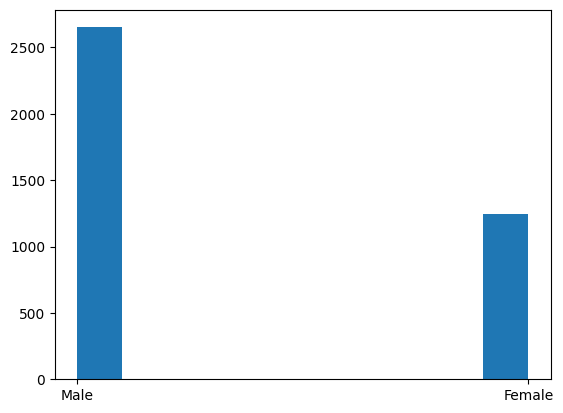

In [ ]:
plt.hist(df['Gender'])

3. определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары:
- по графику выше видно, что чаще всего покупают мужчины,чаще всего покупают люди в возрасте 69,57 и 41 года

In [ ]:
often_purchases_age = df.groupby('Age').count()['Customer ID'].reset_index()
often_purchases_age.sort_values(by='Customer ID', ascending=False).head(3)

,Age,Customer ID
51,69,88
39,57,87
23,41,86


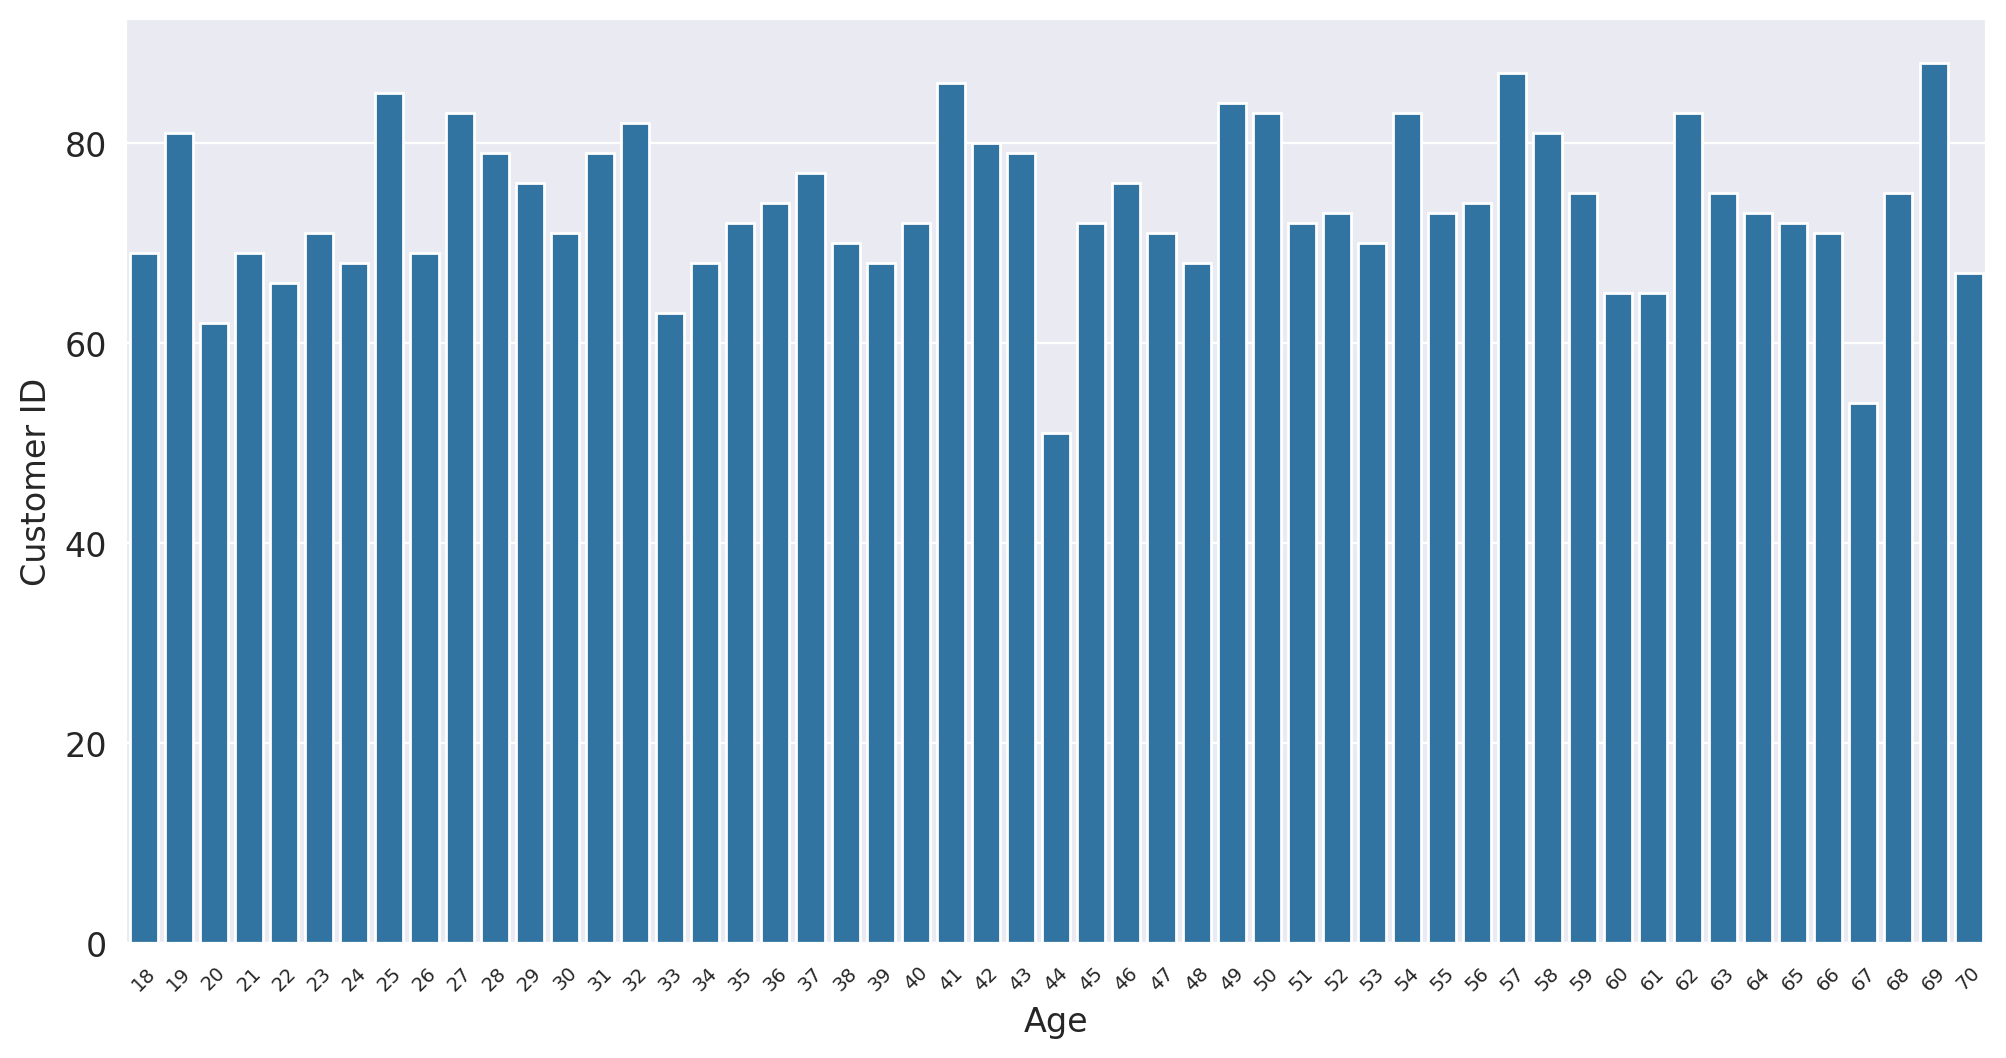

In [ ]:
sns.barplot(data = often_purchases_age, x ='Age', y= 'Customer ID');
plt.xticks(rotation=45, fontsize=7);

Больше всего (здесь понимаю как на большую сумму):
- мужчины покупают в два раза больше чем женщины
- больше всего покупают люди в возрасте 49, 69 и 25 лет

In [ ]:
more_things_gender = df.groupby('Gender').sum()['Purchase Amount (USD)'].reset_index()
more_things_gender

,Gender,Purchase Amount (USD)
0,Female,75191
1,Male,157890


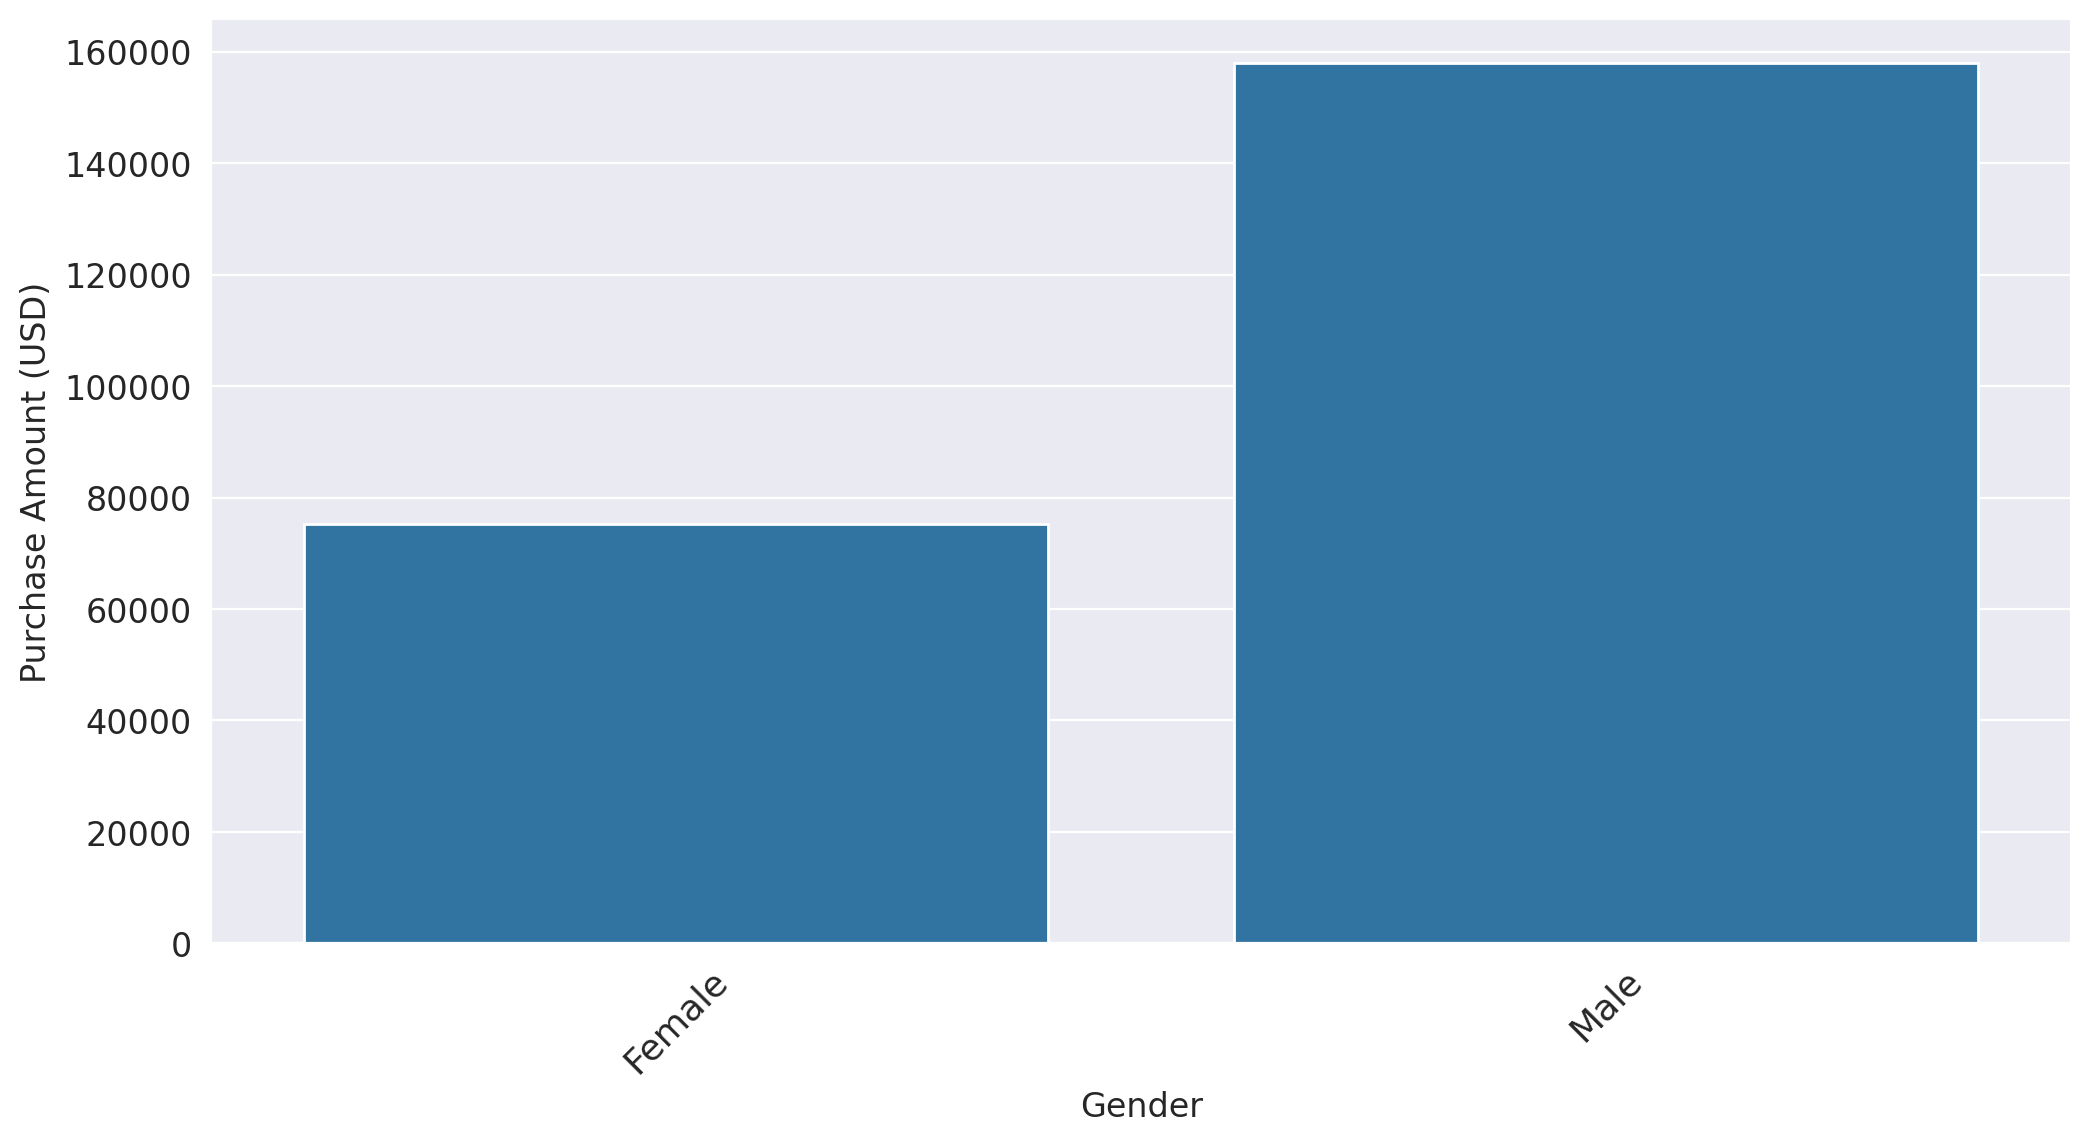

In [ ]:
sns.barplot(data = more_things_gender, x ='Gender', y= 'Purchase Amount (USD)');
plt.xticks(rotation=45, fontsize=13);

In [ ]:
more_things_age = df.groupby('Age').sum()['Purchase Amount (USD)'].reset_index()
more_things_age.sort_values(by='Purchase Amount (USD)', ascending=False).head(3)

,Age,Purchase Amount (USD)
31,49,5552
51,69,5484
7,25,5372


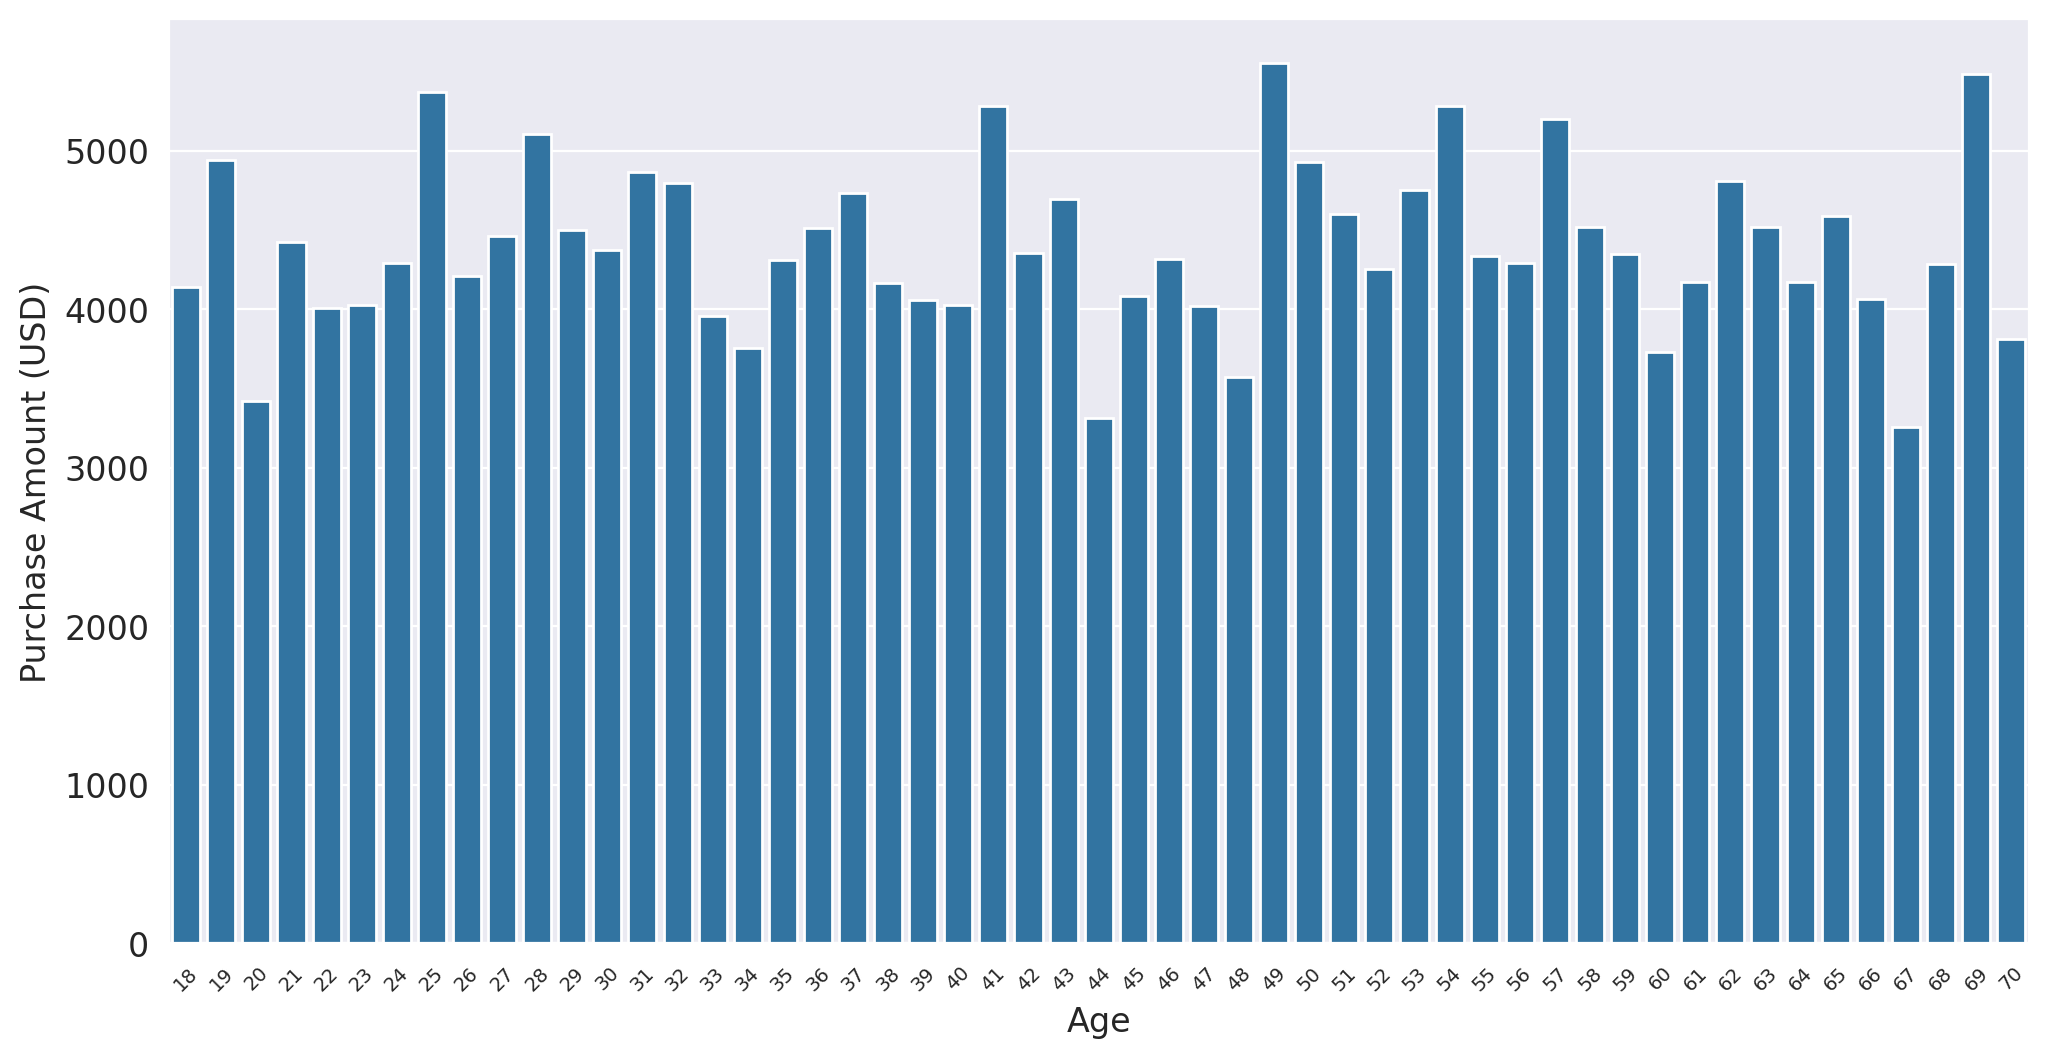

In [ ]:
sns.barplot(data = more_things_age, x ='Age', y= 'Purchase Amount (USD)');
plt.xticks(rotation=45, fontsize=7);

- Самые дорогие товары покупают в основном мужчины
- Самые дорогие товары покупают люди в возрасте 20, 62 и 24 лет

Здесь в качестве самых дорогих я рассматриваю три самые большие цены 100, 99 и 98

In [ ]:
df_expensive_thing = df.groupby(['Purchase Amount (USD)', 'Gender']).count()['Customer ID']
df_expensive_thing.tail(6)

Purchase Amount (USD)  Gender
98                     Female    18
                       Male      34
99                     Female    21
                       Male      31
100                    Female    11
                       Male      25
Name: Customer ID, dtype: int64

In [ ]:
df_price_100 = df[(df['Purchase Amount (USD)']==100) | (df['Purchase Amount (USD)']==99) | (df['Purchase Amount (USD)']==98)]
df_expensive_thing_age = df_price_100.groupby(['Age']).count()['Customer ID'].reset_index()
df_expensive_thing_age.sort_values(by='Customer ID', ascending=False).head(3)

,Age,Customer ID
2,20,6
42,62,5
6,24,5


4. определите, есть ли зависимость между цветом одежды и сезоном: в зависимости от сезона цвета меняются, топ наиболее и наименее популярных цветов зависит от сезона.

In [ ]:
color_season = (df.groupby(['Season', 'Color']).count()['Customer ID']).reset_index()
top_colors_per_season = color_season.groupby('Season').apply(lambda x: x.nlargest(5, 'Customer ID')).drop('Season', axis = 1)
top_colors_per_season

<ipython-input-80-b3fefac88e68>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_colors_per_season = color_season.groupby('Season').apply(lambda x: x.nlargest(5, 'Customer ID')).drop('Season', axis = 1)


Color  Customer ID
Season                         
Fall   11  Magenta           50
       24   Yellow           50
       13    Olive           47
       14   Orange           45
       7      Gray           44
Spring 38    Olive           52
       32     Gray           48
       45     Teal           46
       47   Violet           45
       41     Pink           44
Summer 69   Silver           59
       70     Teal           49
       52     Blue           46
       58    Green           44
       73    White           43
Winter 83    Green           50
       99   Yellow           46
       90    Peach           45
       91     Pink           45
       87   Maroon           44

In [ ]:
color_season_worse = (df.groupby(['Season', 'Color']).count()['Customer ID']).reset_index()
worse_colors_per_season = color_season.groupby('Season').apply(lambda x: x.nsmallest(5, 'Customer ID')).drop('Season', axis = 1)
worse_colors_per_season

<ipython-input-82-c20fe3018042>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worse_colors_per_season = color_season.groupby('Season').apply(lambda x: x.nsmallest(5, 'Customer ID')).drop('Season', axis = 1)


Color  Customer ID
Season                           
Fall   21  Turquoise           27
       23      White           27
       2        Blue           32
       4    Charcoal           32
       0       Beige           34
Spring 43        Red           31
       35   Lavender           32
       28      Brown           33
       48      White           36
       34     Indigo           37
Summer 65      Peach           24
       66       Pink           29
       56       Gold           30
       59     Indigo           32
       53      Brown           33
Winter 82       Gray           27
       86    Magenta           30
       89     Orange           33
       92     Purple           33
       81       Gold           34

<Axes: xlabel='Season', ylabel='Customer ID'>

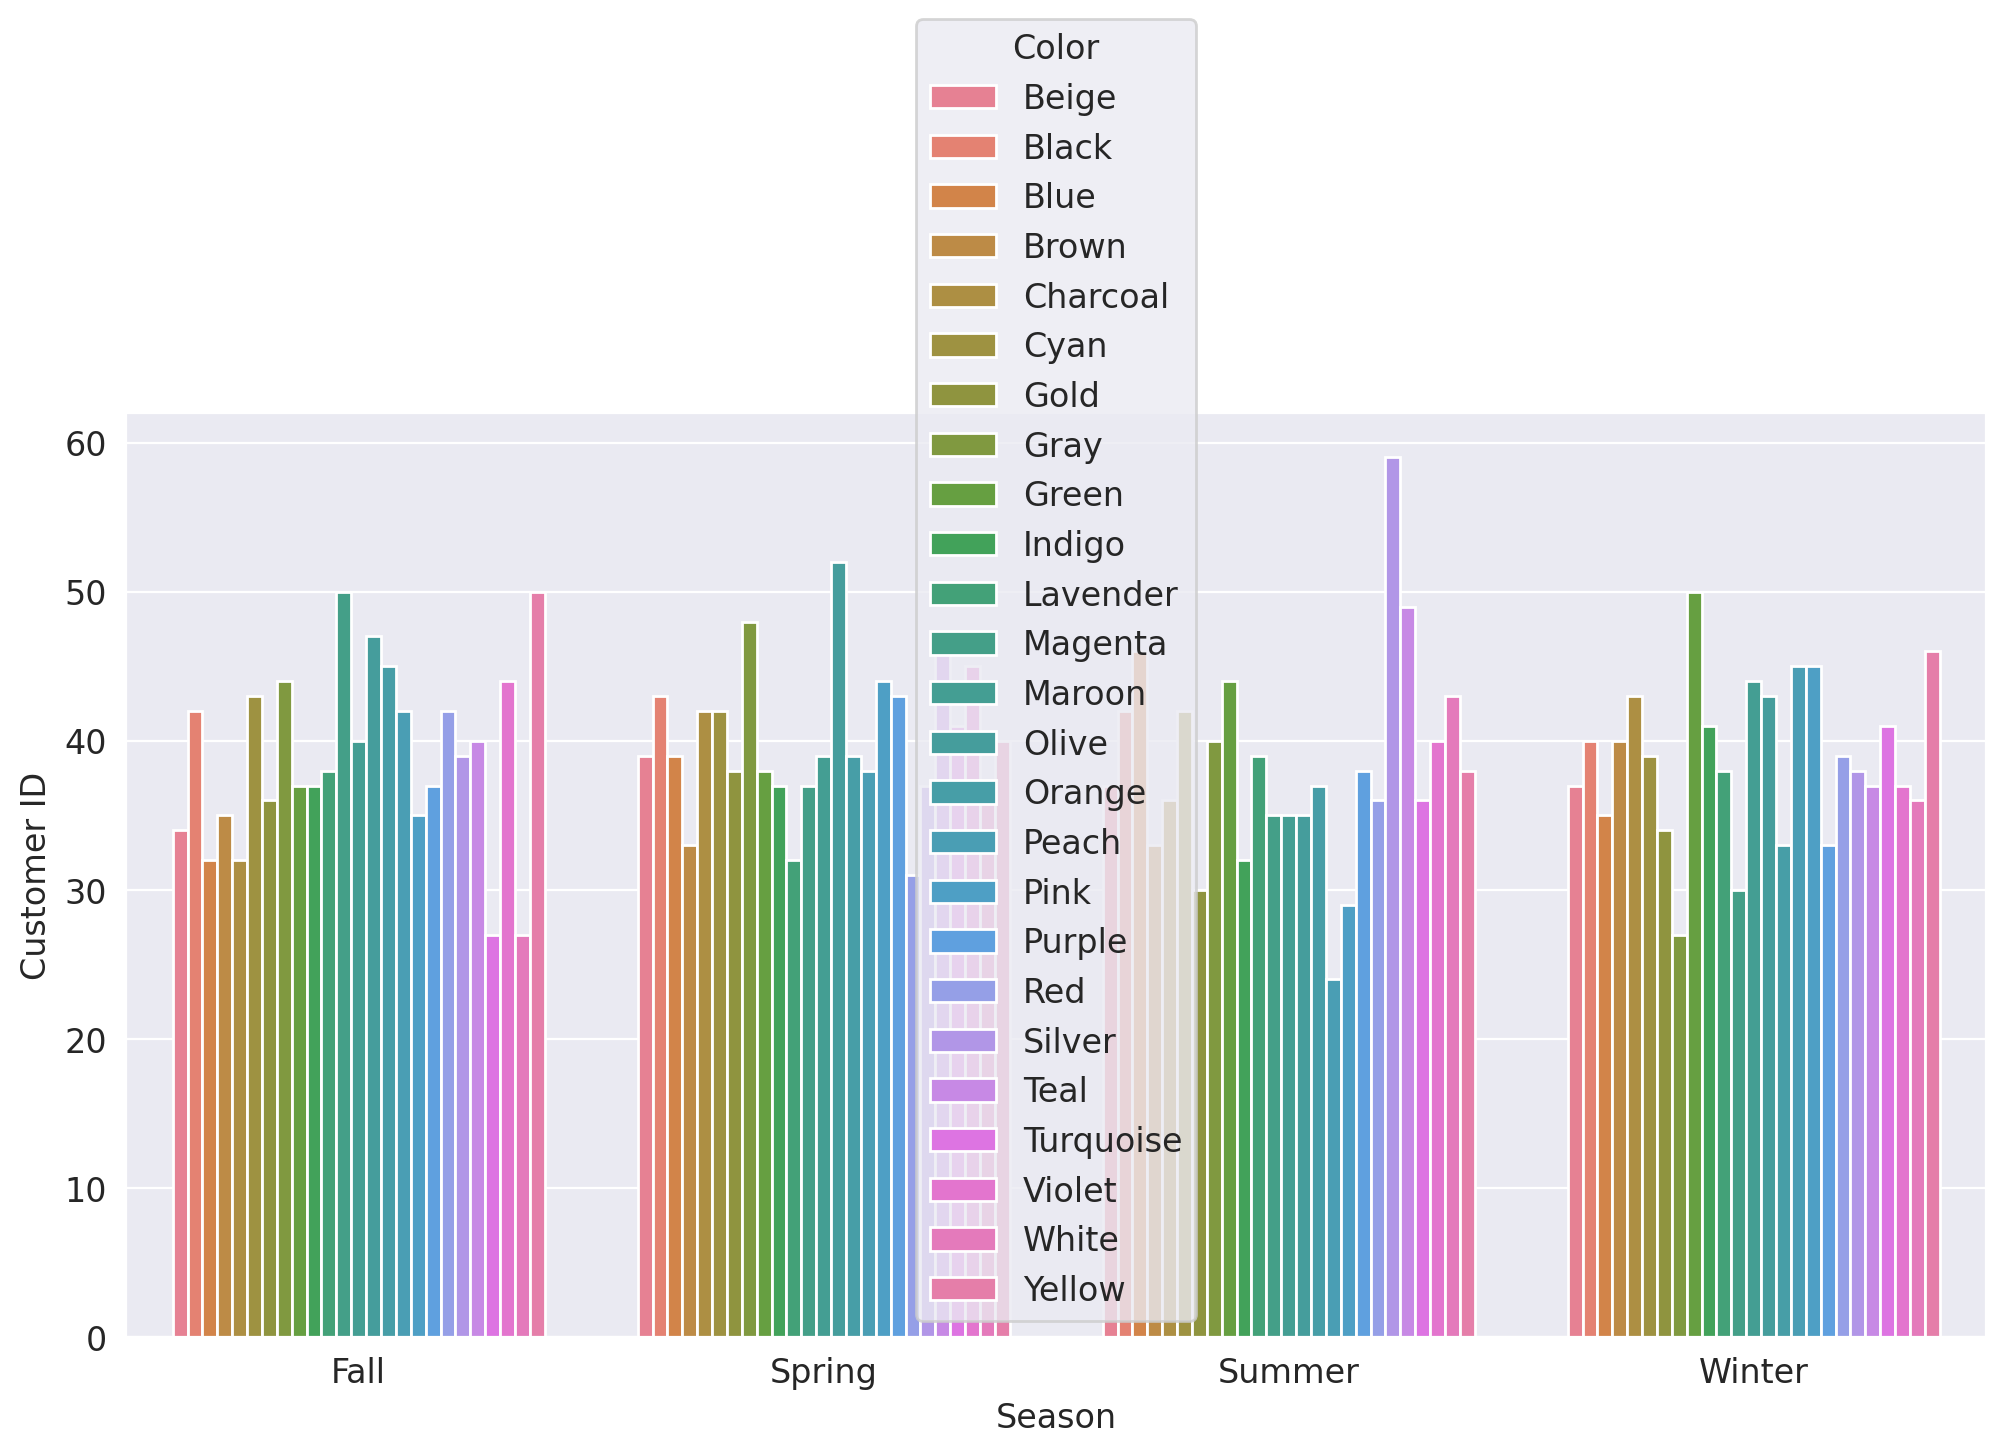

In [ ]:
color_season = df.groupby(['Season', 'Color']).count()['Customer ID'].reset_index()
sns.barplot(data=color_season, x='Season', y='Customer ID', hue='Color')

5. посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику

Примечание: все покупатели имеют разные Customer ID, поэтому считаю, что каждый покупатель уникальный

Наибольшее количество покупателей осенью, наименьшее летом. В целом количество покупателей не существенно меняется от сезона к сезону

In [ ]:
mau_season = df.groupby('Season').count()['Customer ID'].reset_index()
season_dict = {'Winter':1,'Spring':2,'Summer':3, 'Fall':4}
mau_season = mau_season.sort_values('Season', key = lambda x : x.apply (lambda x : season_dict[x]))
mau_season

,Season,Customer ID
3,Winter,971
1,Spring,999
2,Summer,955
0,Fall,975


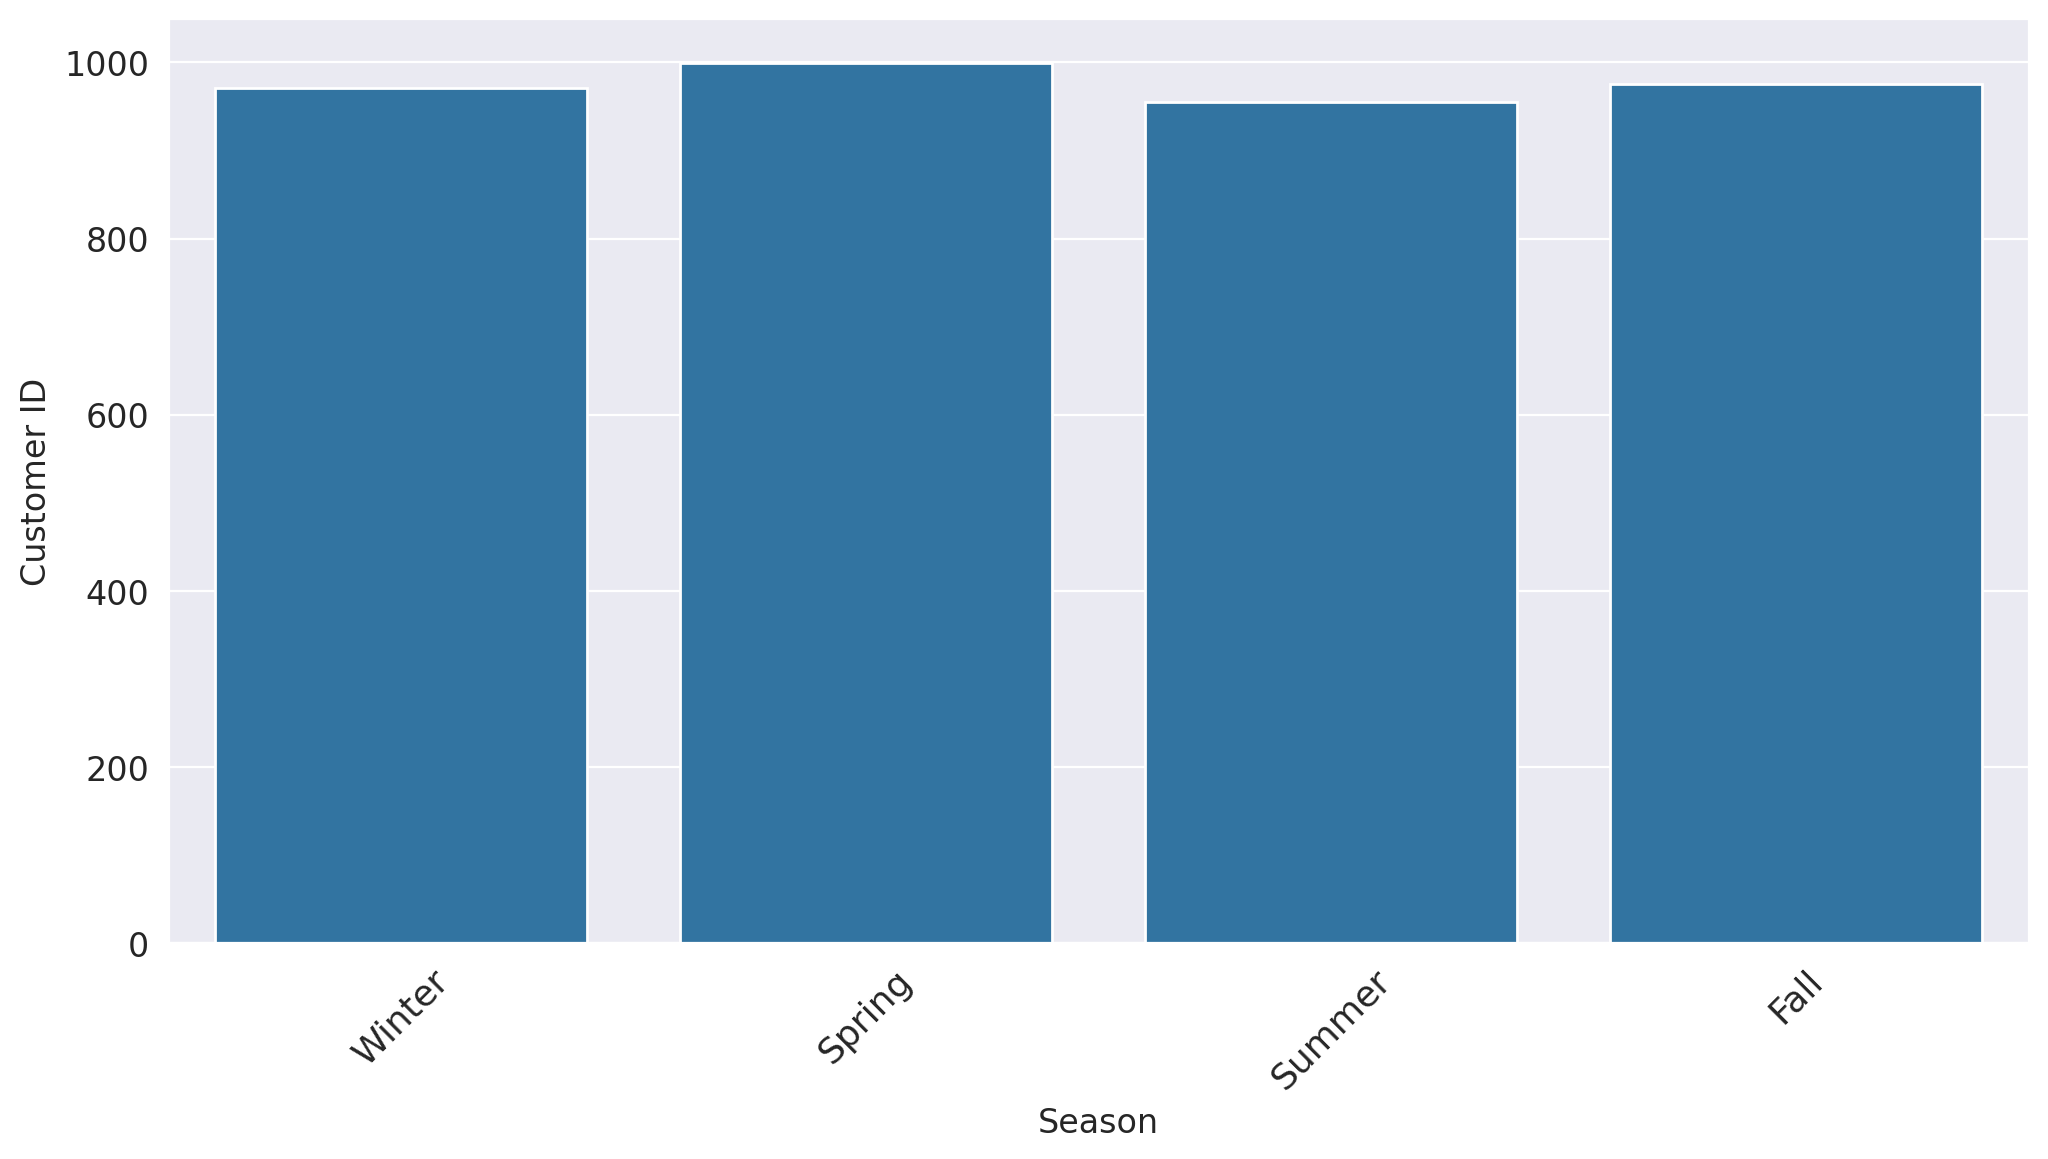

In [ ]:
sns.barplot(data = mau_season, x ='Season', y= 'Customer ID');
plt.xticks(rotation=45, fontsize=13);

6. найдите самую популярную букву в названии одежды: самая популярная буква "s", она встречается 2068 раз.

In [ ]:
from collections import Counter

df_clothing = df[df['Category']=='Clothing']
all_letter = ''.join(df_clothing['Item Purchased'])
letters = list(all_letter.replace(' ', '').lower())
letter_count = Counter(letters)
most_common_letter = letter_count.most_common(1)
most_common_letter

[('s', 2068)]

<h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [ ]:
df_dr = pd.read_csv('drinks.csv')
df_dr

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [ ]:
beer = df_dr[['country', 'beer_servings']].sort_values(by = 'beer_servings', ascending = False)
beer.head(10)

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


Самое большое количество пива пьют в Namibia, Czech Republic,  Gabon


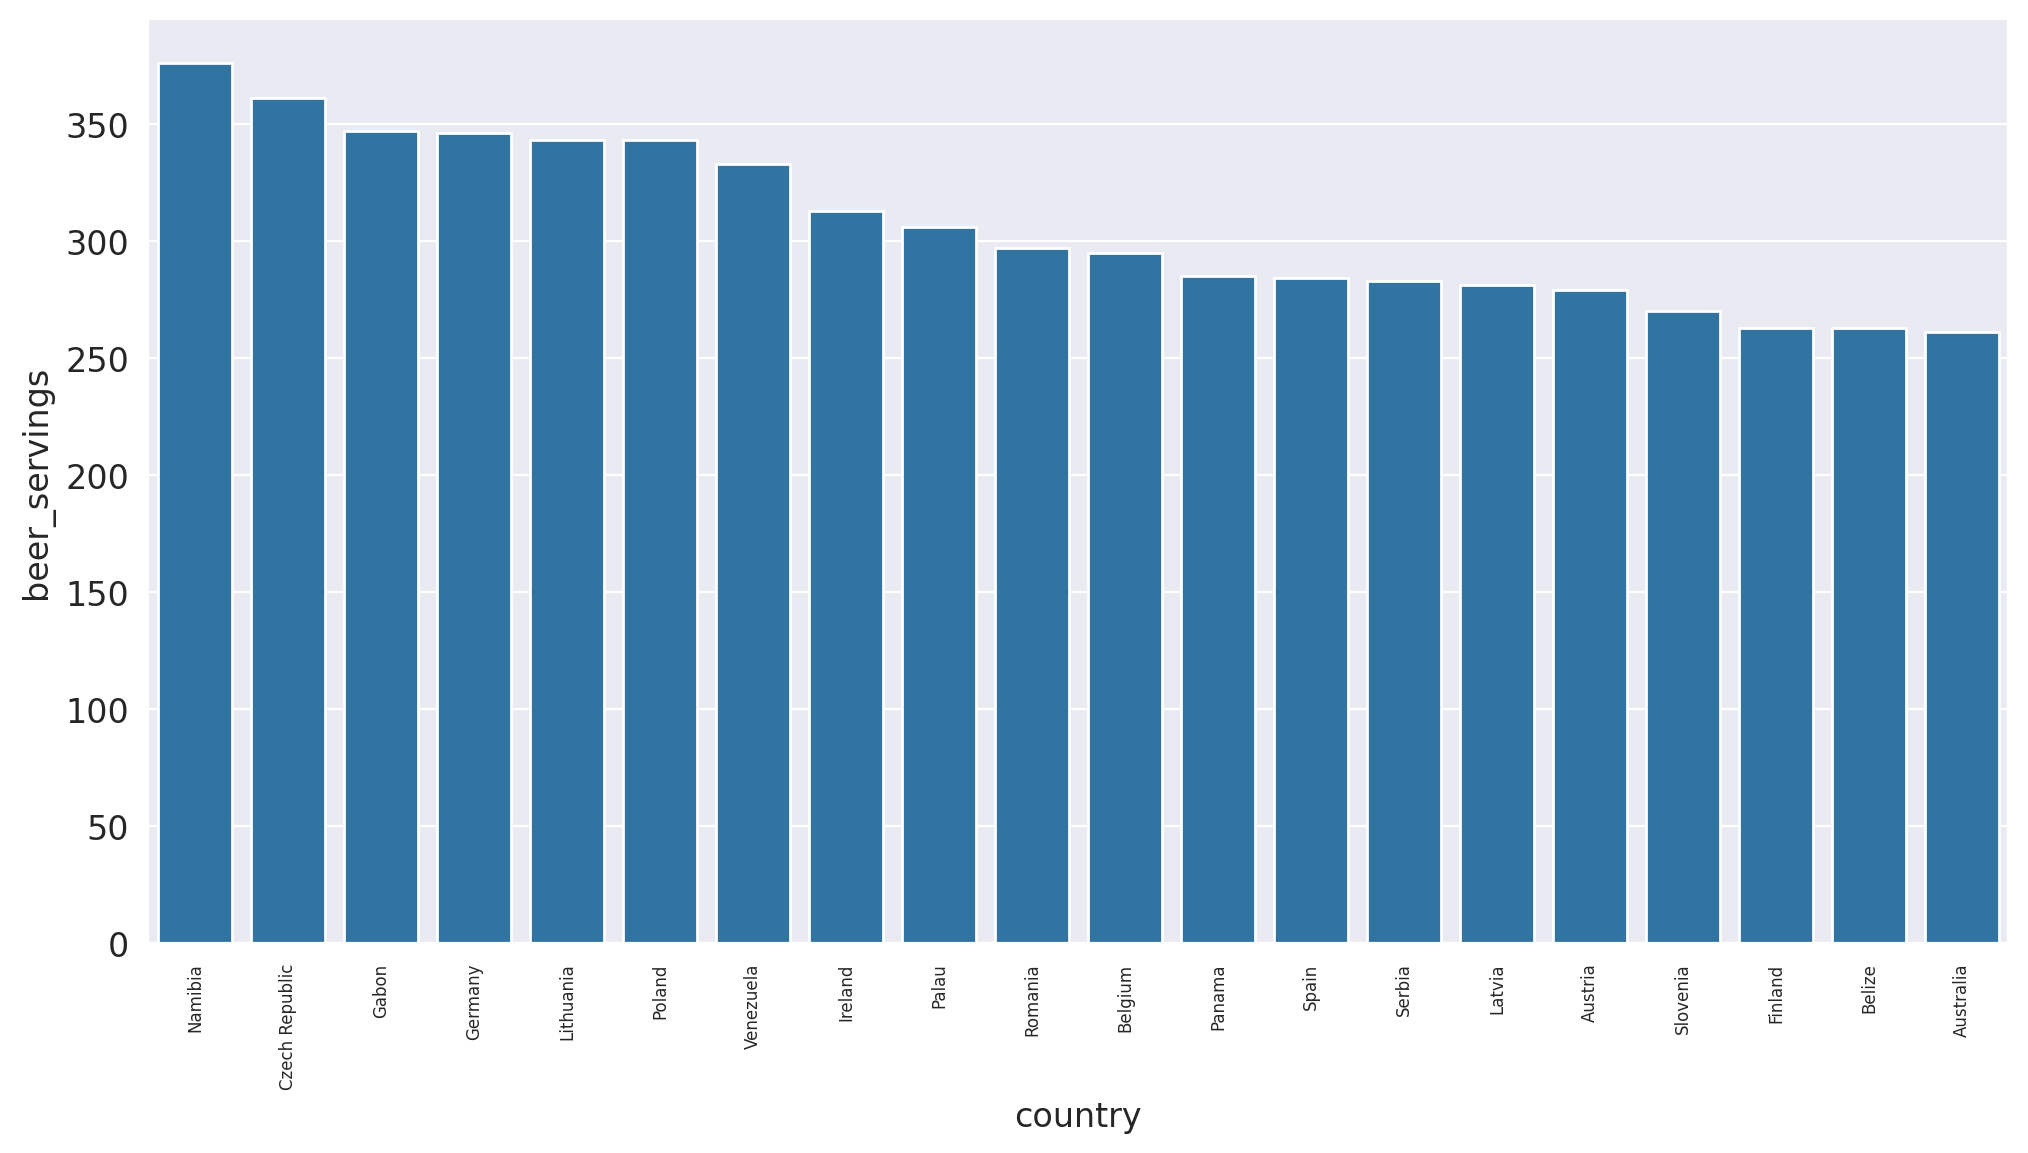

In [ ]:
sns.barplot(data = beer.head(20), x ='country', y= 'beer_servings');
plt.xticks(rotation=90, fontsize=6);

In [ ]:
spirit = df_dr[['country', 'spirit_servings']].sort_values(by = 'spirit_servings', ascending = False)
spirit.head(10)

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315
72,Guyana,302
155,Slovakia,293
50,Dominica,286
169,Thailand,258
40,Cook Islands,254


Самое большое количество spirit пьют в Гренаде, Беларуси и Гаити

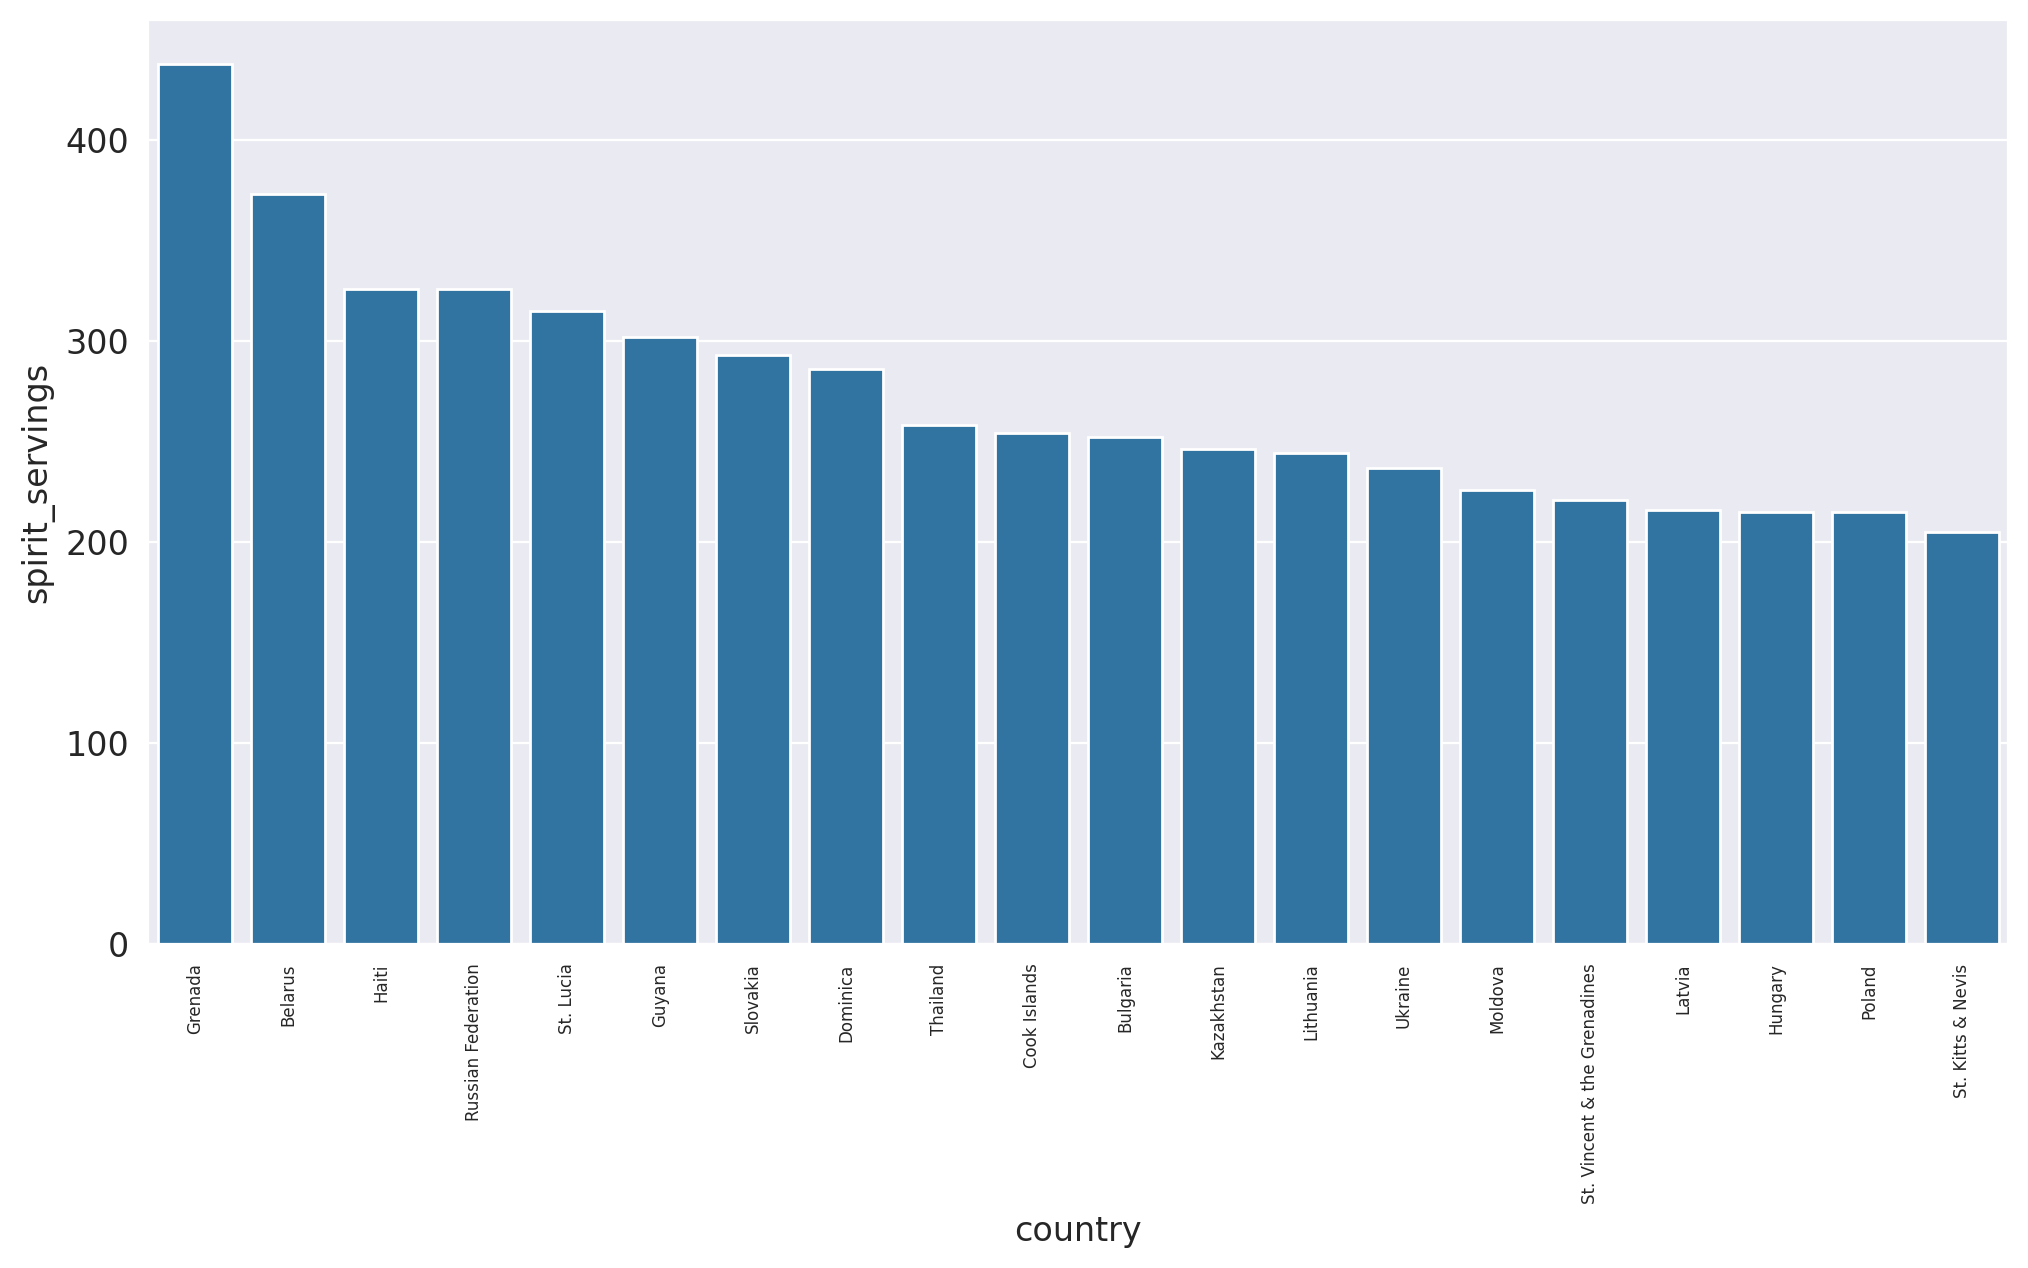

In [ ]:
sns.barplot(data = spirit.head(20), x ='country', y= 'spirit_servings');
plt.xticks(rotation=90, fontsize=6);

In [ ]:
wine = df_dr[['country', 'wine_servings']].sort_values(by = 'wine_servings', ascending = False)
wine.head(10)

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


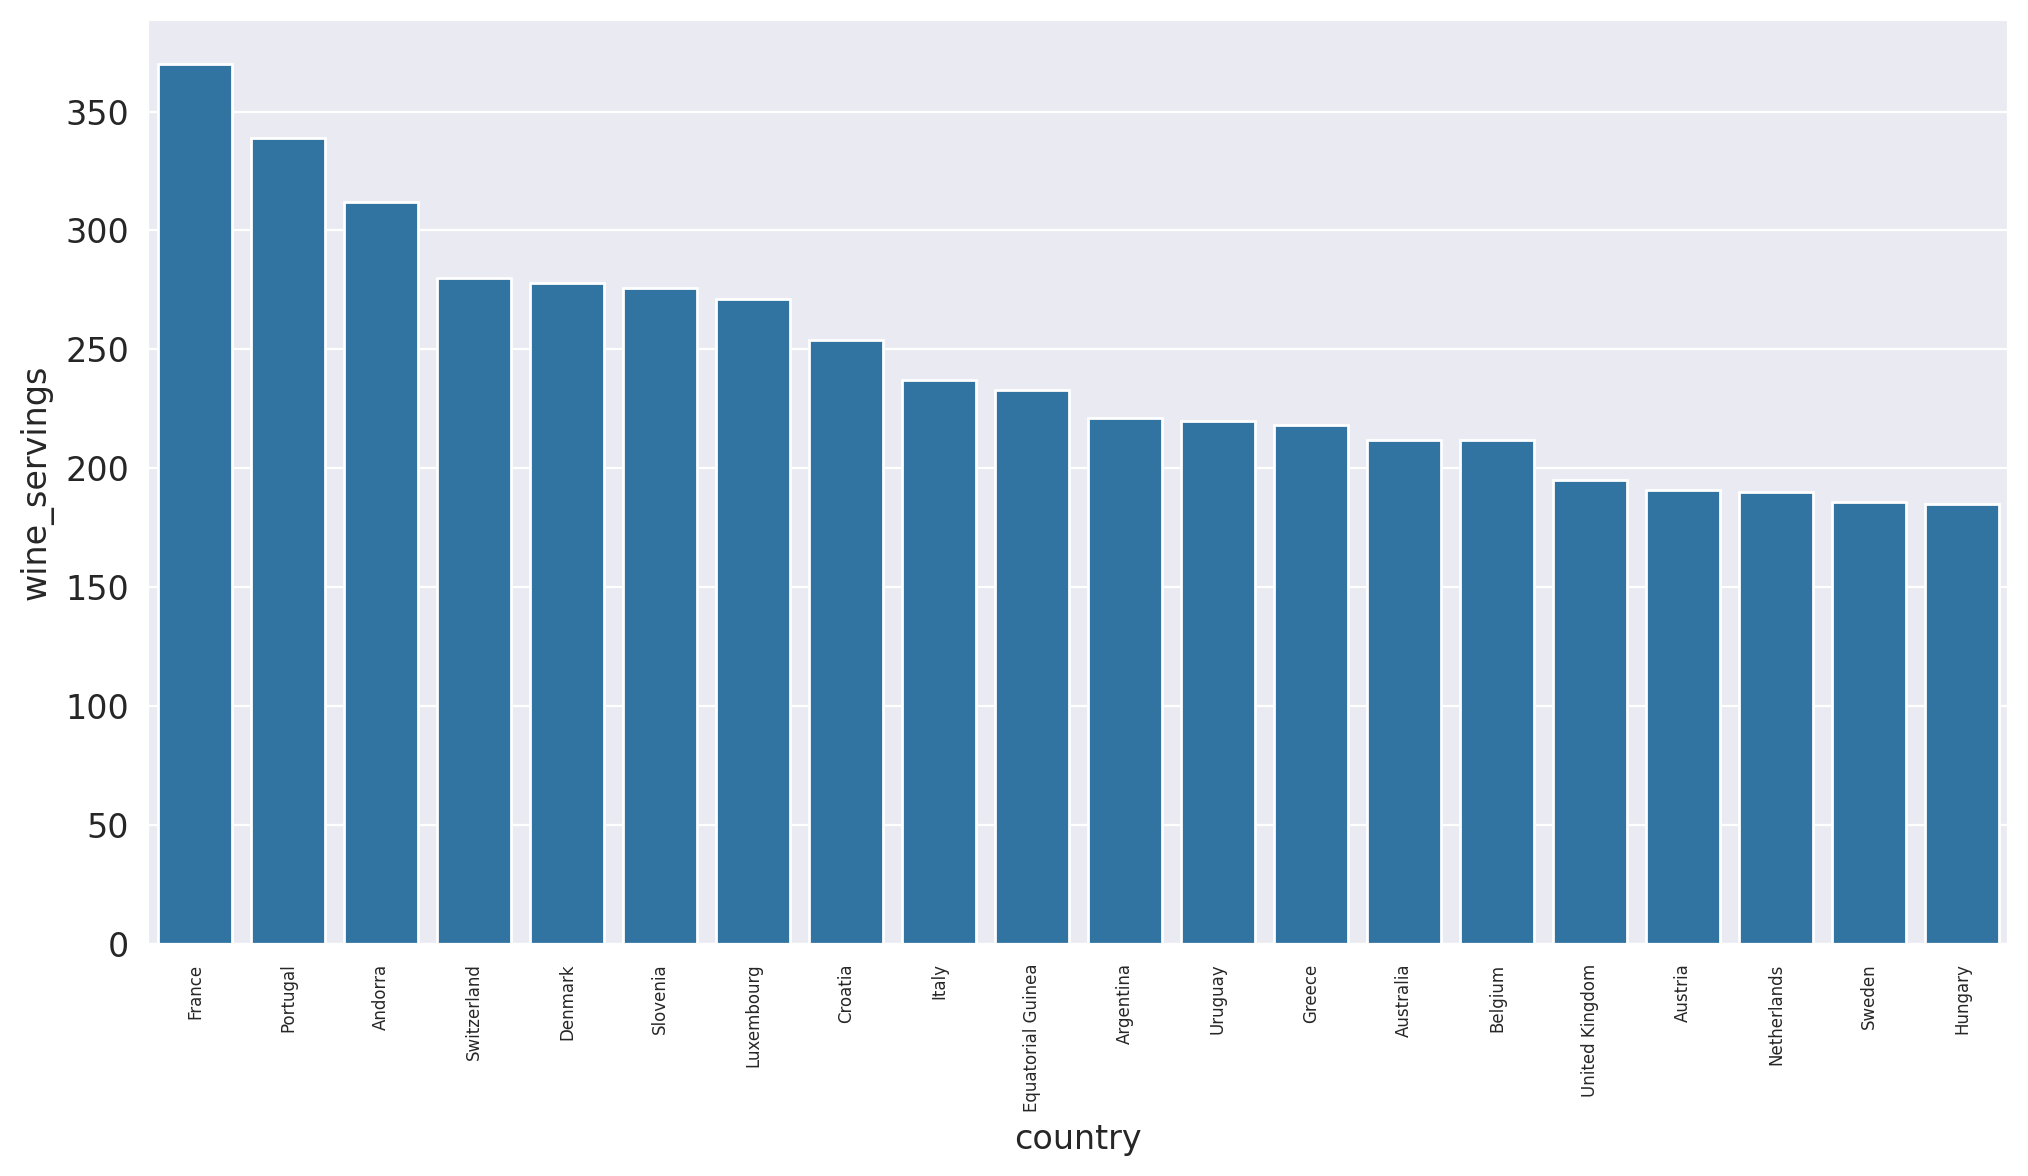

In [ ]:
sns.barplot(data = wine.head(20), x ='country', y= 'wine_servings');
plt.xticks(rotation=90, fontsize=6);

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [ ]:
df_movie = pd.read_csv('tarantino.csv')
df_movie

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


Число проклятий 1704, смертей 190

In [ ]:
df_movie['type'].value_counts()

,count
type,
word,1704
death,190


Соотношение по фильмам в таблице ниже

In [ ]:
word_death_movie = (df_movie.groupby(['movie', 'type']).count()['minutes_in']/df_movie.groupby(['movie']).count()['minutes_in']*100)
word_death_movie

movie                type 
Django Unchained     death    15.210356
                     word     84.789644
Inglorious Basterds  death    45.283019
                     word     54.716981
Jackie Brown         death     1.075269
                     word     98.924731
Kill Bill: Vol. 1    death    52.500000
                     word     47.500000
Kill Bill: Vol. 2    death    13.750000
                     word     86.250000
Pulp Fiction         death     1.470588
                     word     98.529412
Reservoir Dogs       death     2.320186
                     word     97.679814
Name: minutes_in, dtype: float64

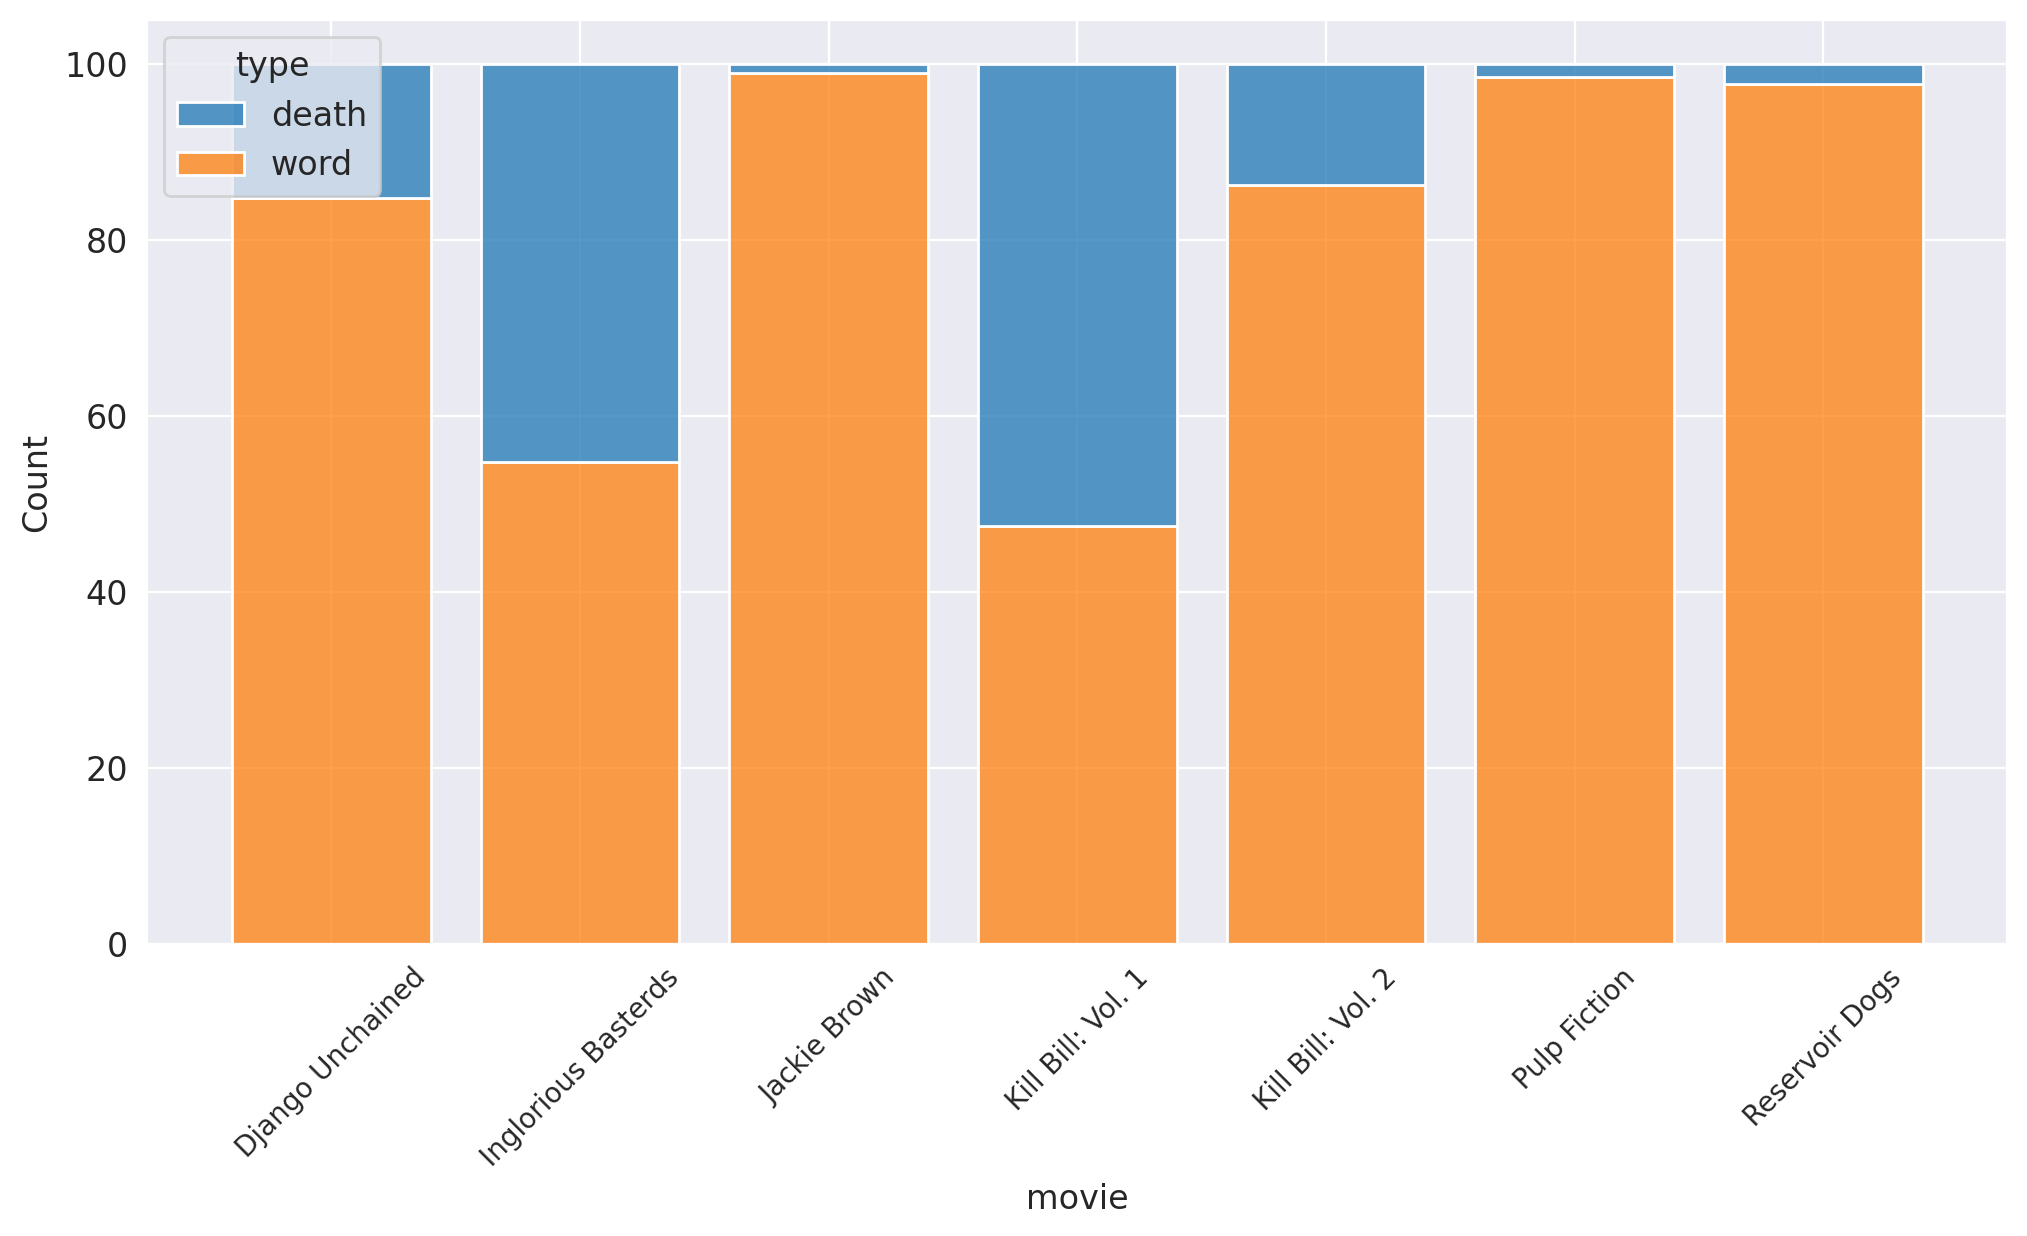

In [ ]:
word_death_movie=word_death_movie.reset_index()
sns.histplot(word_death_movie, x='movie', hue='type', weights='minutes_in', multiple='stack', shrink=0.8)
plt.xticks(rotation=45, fontsize=10);

Частота (проценты) по количеству нахождений одинаковых проклятий в строке "word"

In [ ]:
df_word = df_movie[df_movie['word'].notnull()]
df_word_frequency = (df_word.groupby(['word']).count()['minutes_in']/len(df_word)*100).reset_index()
df_word_frequency.sort_values(by='minutes_in', ascending=False)

,word,minutes_in
28,fucking,23.884977
49,shit,12.969484
22,fuck,12.500000
46,n-word,10.504695
0,ass,8.215962
31,goddamn,6.631455
43,motherfucker,4.107981
7,bitch,3.755869
35,hell,2.640845
15,damn,2.171362


Частота по количеству времени на каждое проклятие

In [ ]:
df_word_time_frequency = (df_word.groupby(['word']).sum()['minutes_in']/df_word['minutes_in'].sum()*100).reset_index()
df_word_time_frequency.sort_values(by='minutes_in', ascending=False)

,word,minutes_in
28,fucking,22.540311
49,shit,13.175573
22,fuck,12.402612
46,n-word,11.570512
0,ass,9.211612
31,goddamn,7.112872
43,motherfucker,4.930865
7,bitch,3.927232
15,damn,2.371449
35,hell,2.233923


распределение времени между проклятия считаю для каждого фильма отдельно

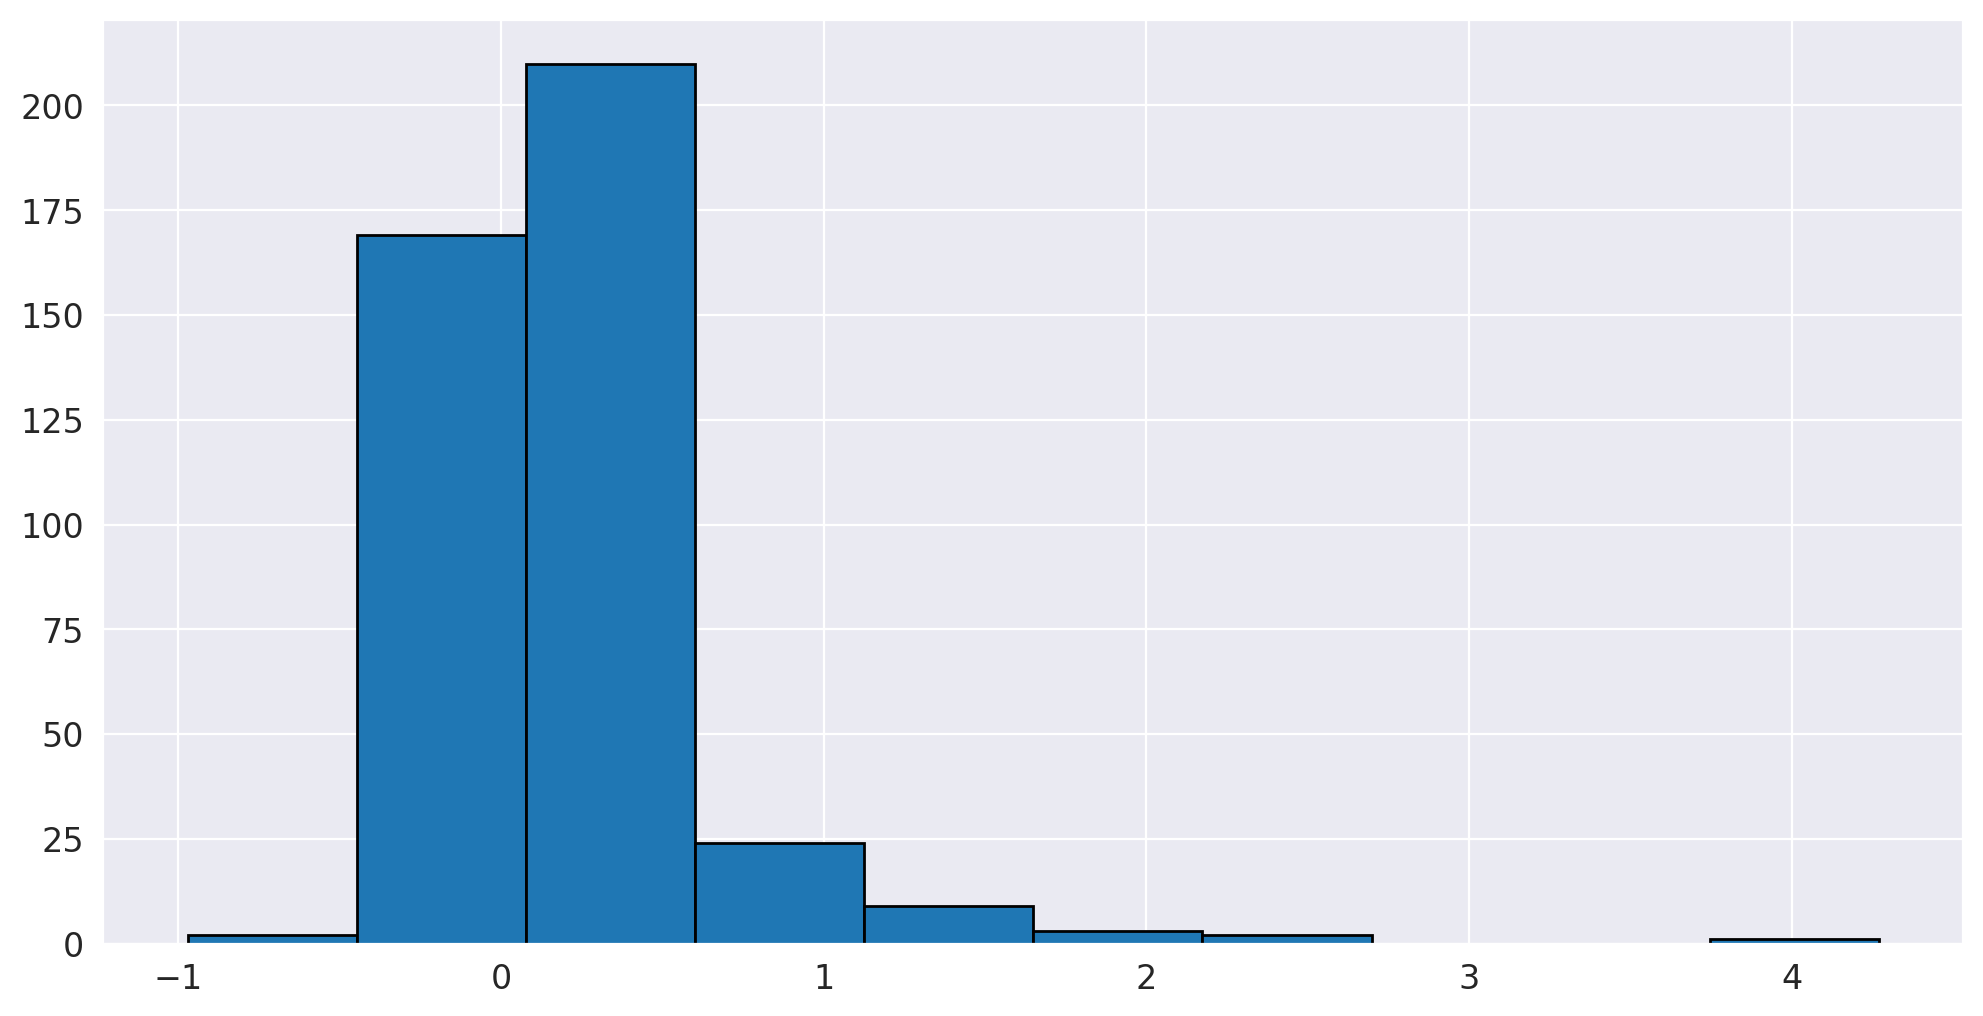

In [ ]:
df_Reservoir_Dogs = df_word[df_word['movie']=='Reservoir Dogs']
intervals_time = np.diff(df_Reservoir_Dogs['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');

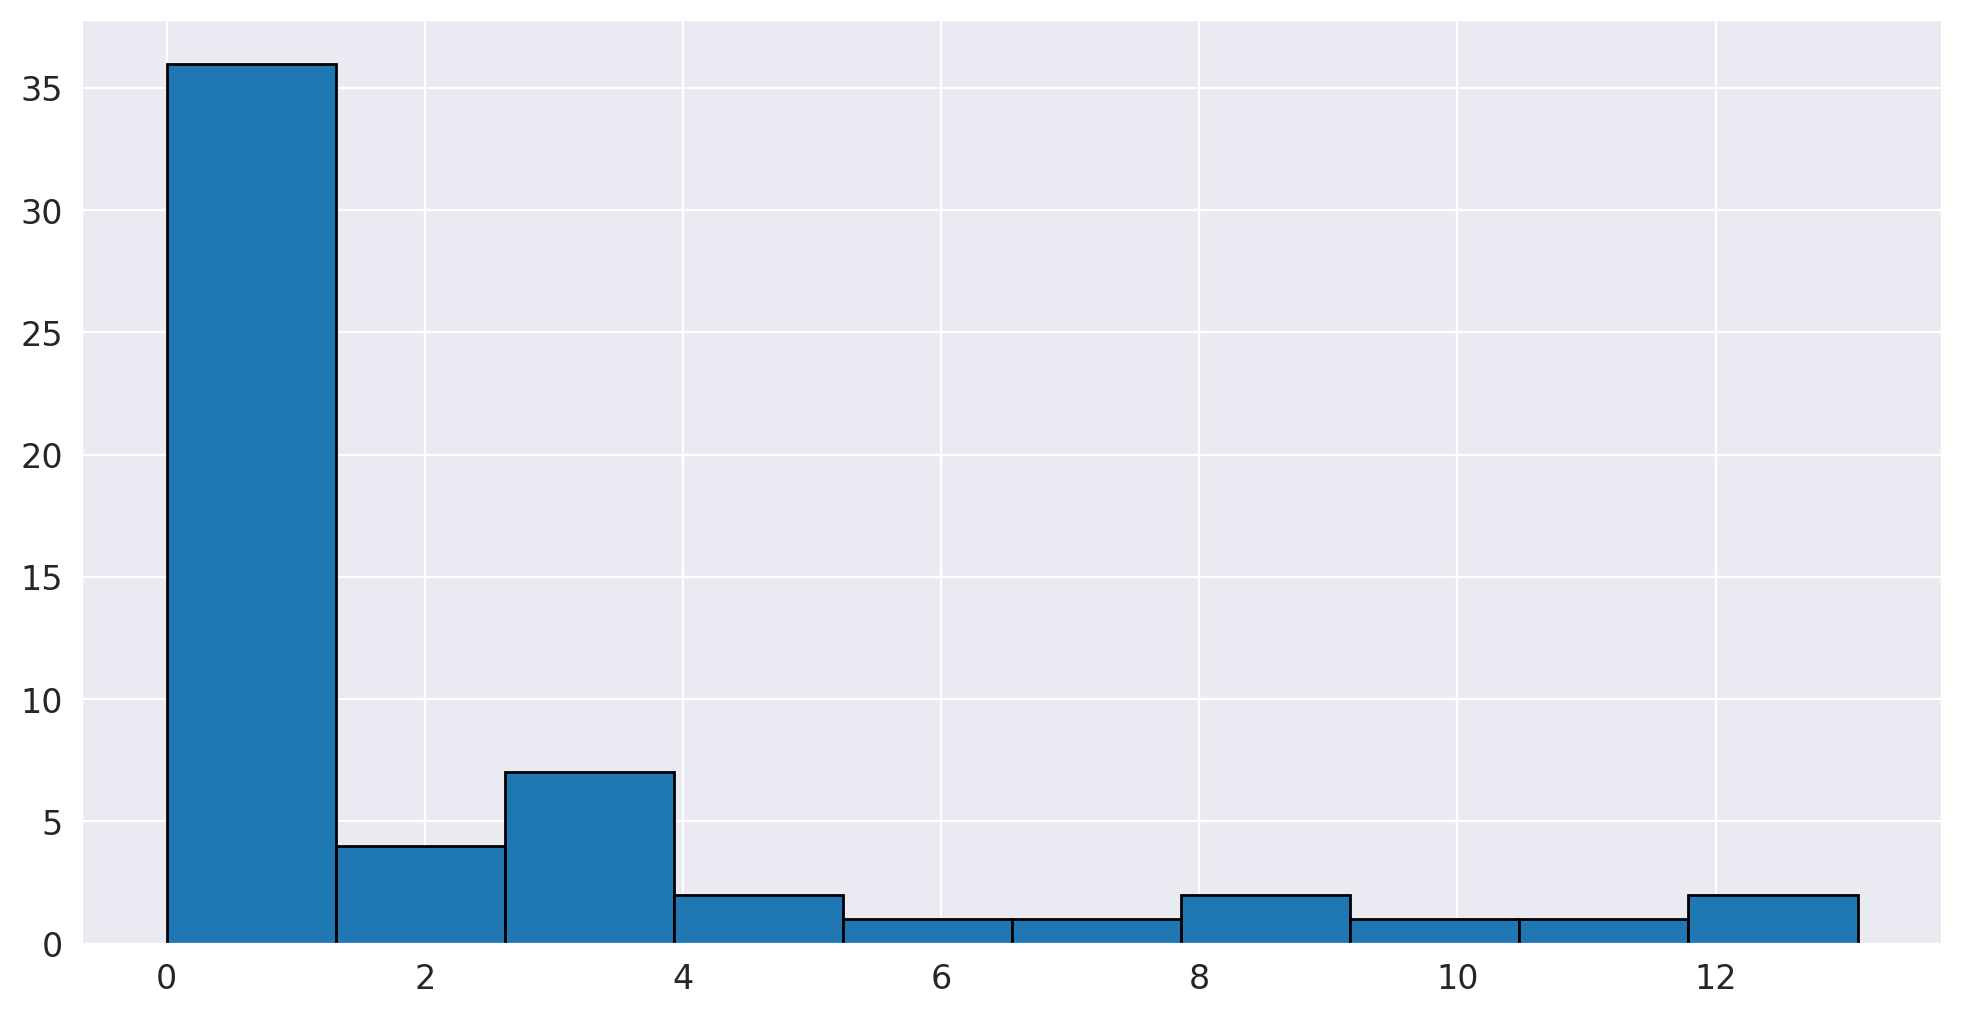

In [ ]:
df_Inglorious_Basterds = df_word[df_word['movie']=='Inglorious Basterds']
intervals_time = np.diff(df_Inglorious_Basterds['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');

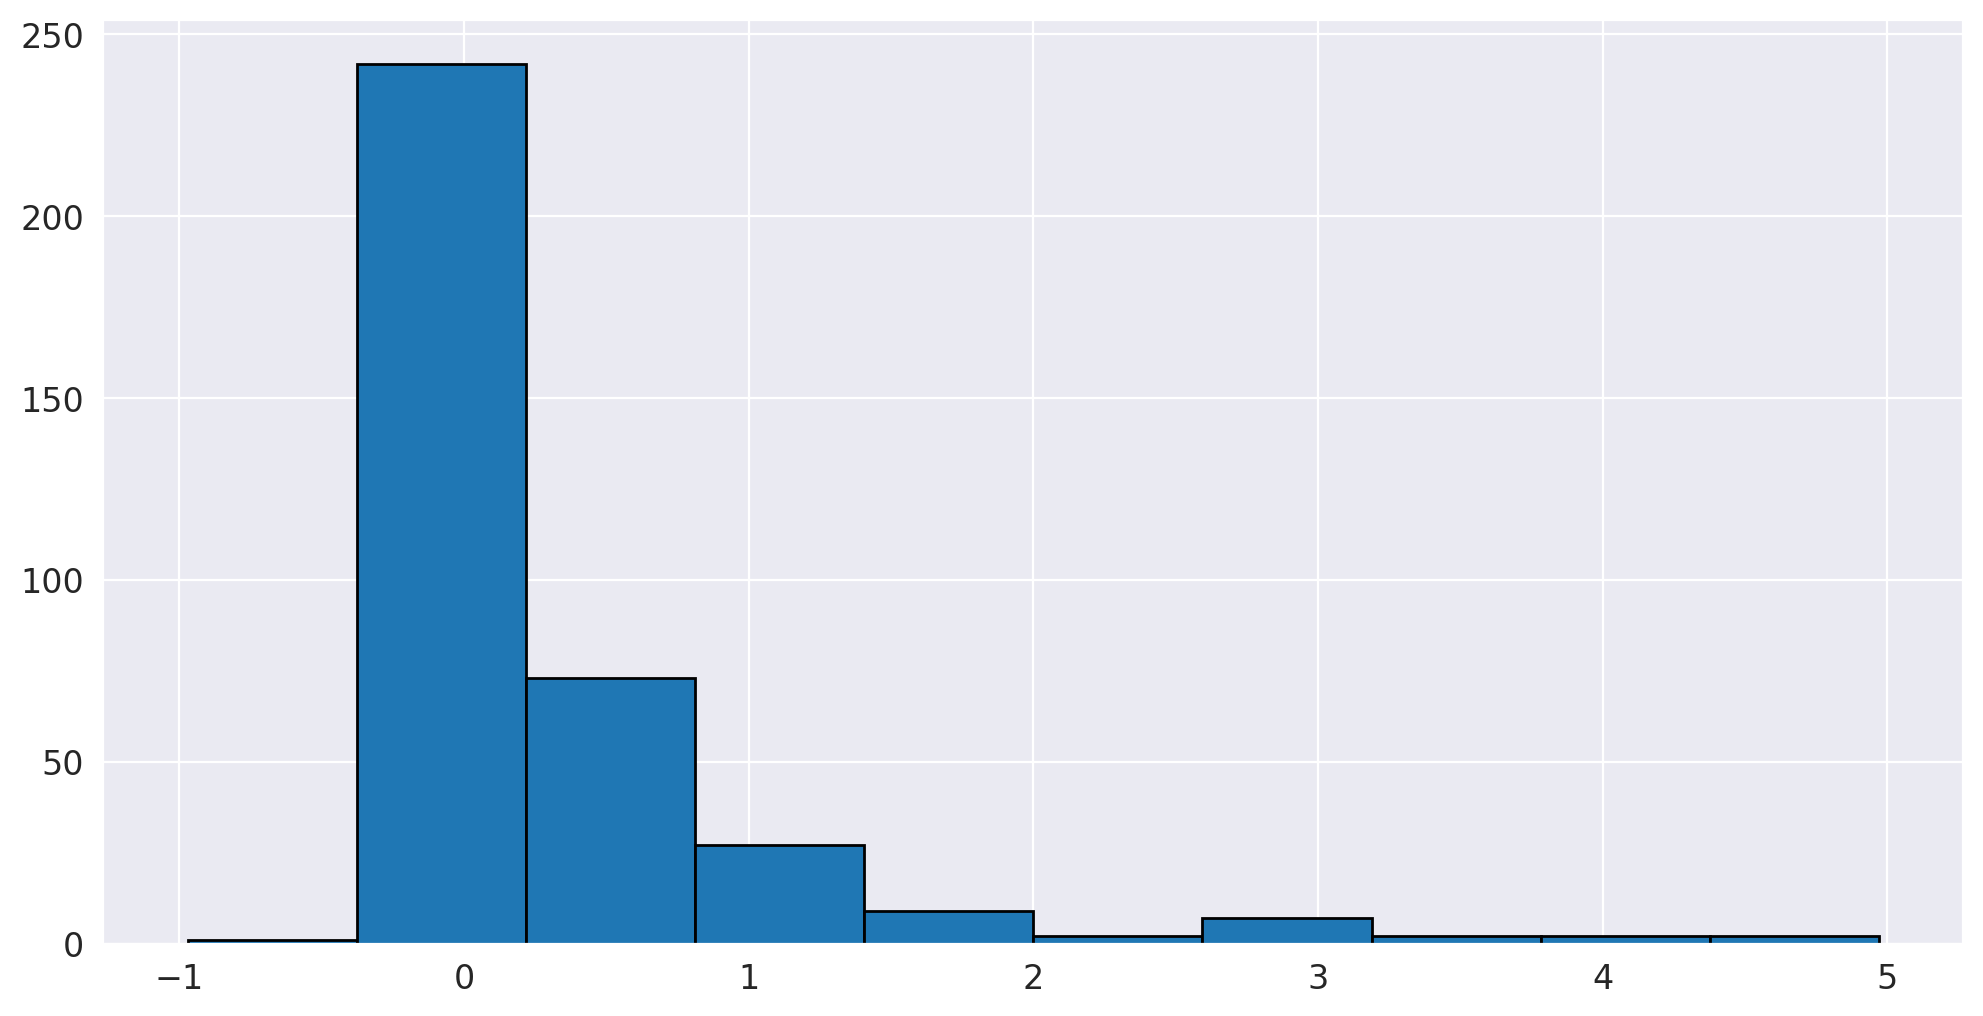

In [ ]:
df_Jackie_Brown = df_word[df_word['movie']=='Jackie Brown']
intervals_time = np.diff(df_Jackie_Brown['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');

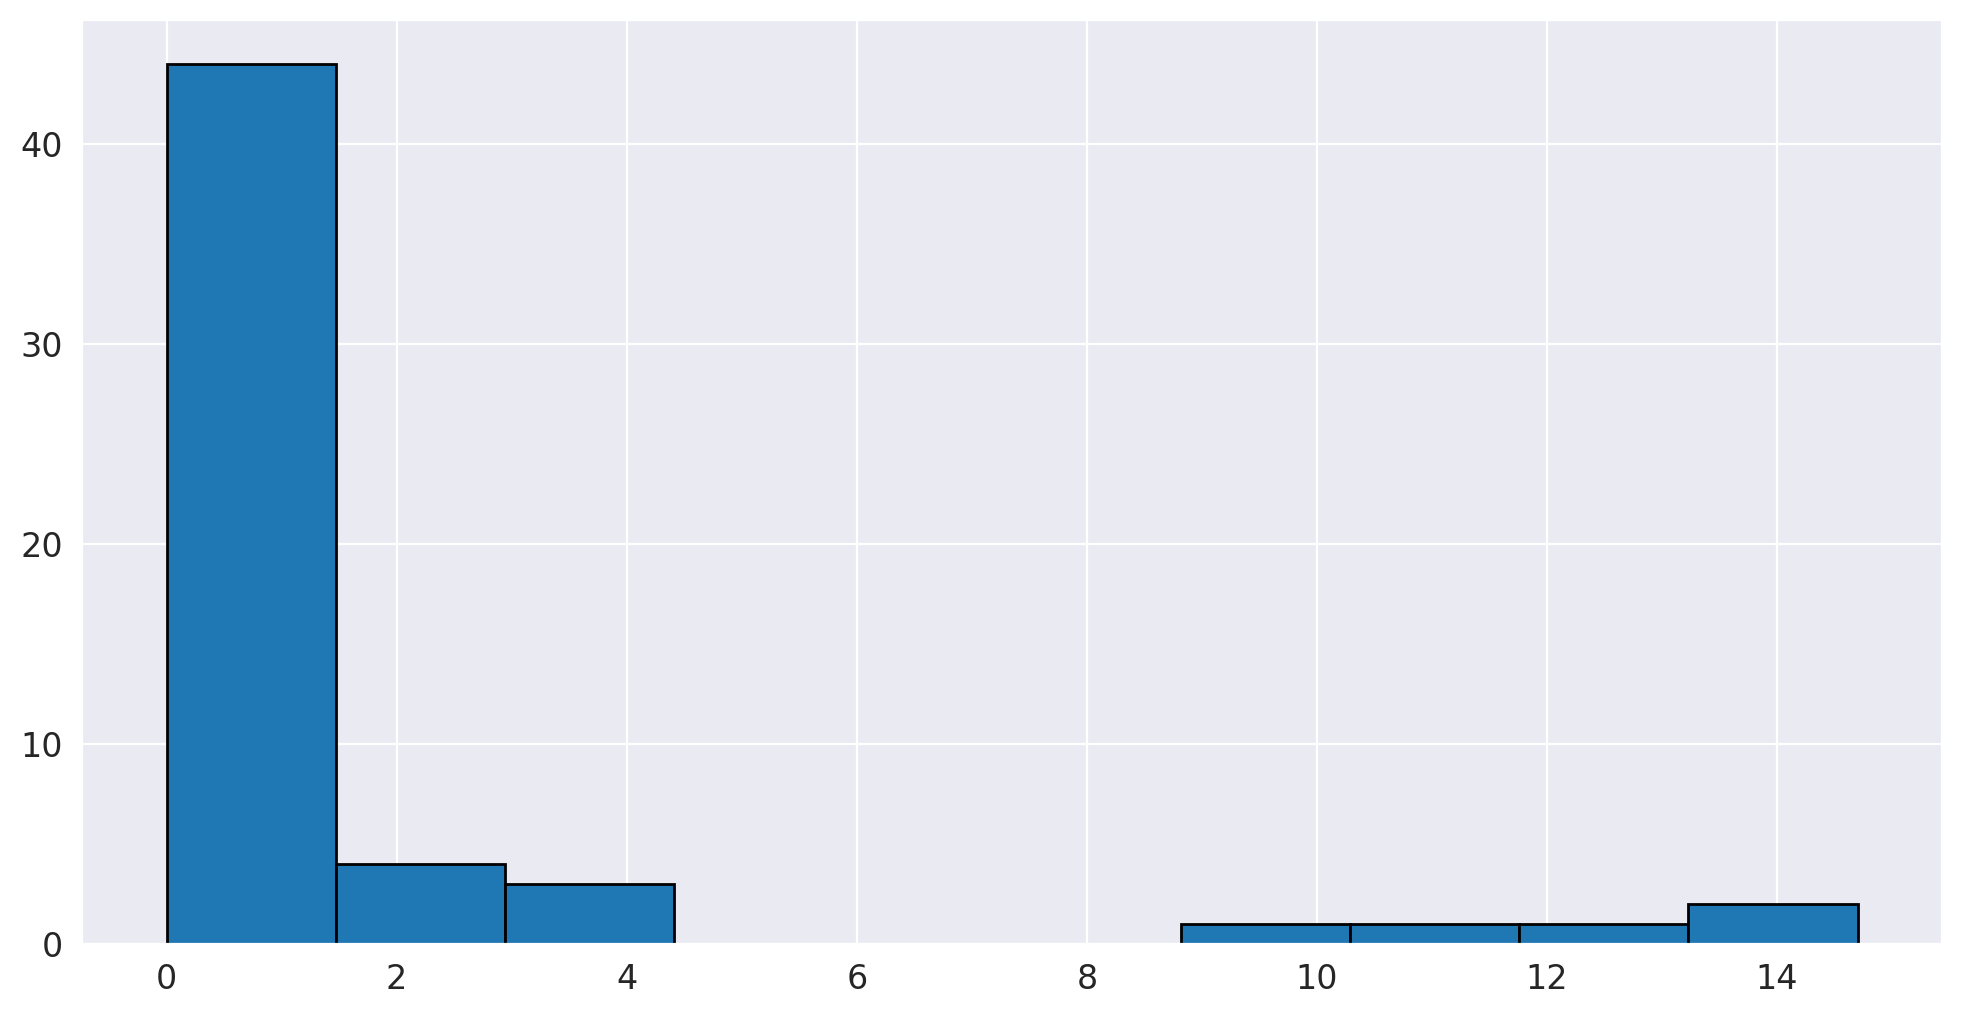

In [ ]:
df_Kill_Bill_1 = df_word[df_word['movie']=='Kill Bill: Vol. 1']
intervals_time = np.diff(df_Kill_Bill_1['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');

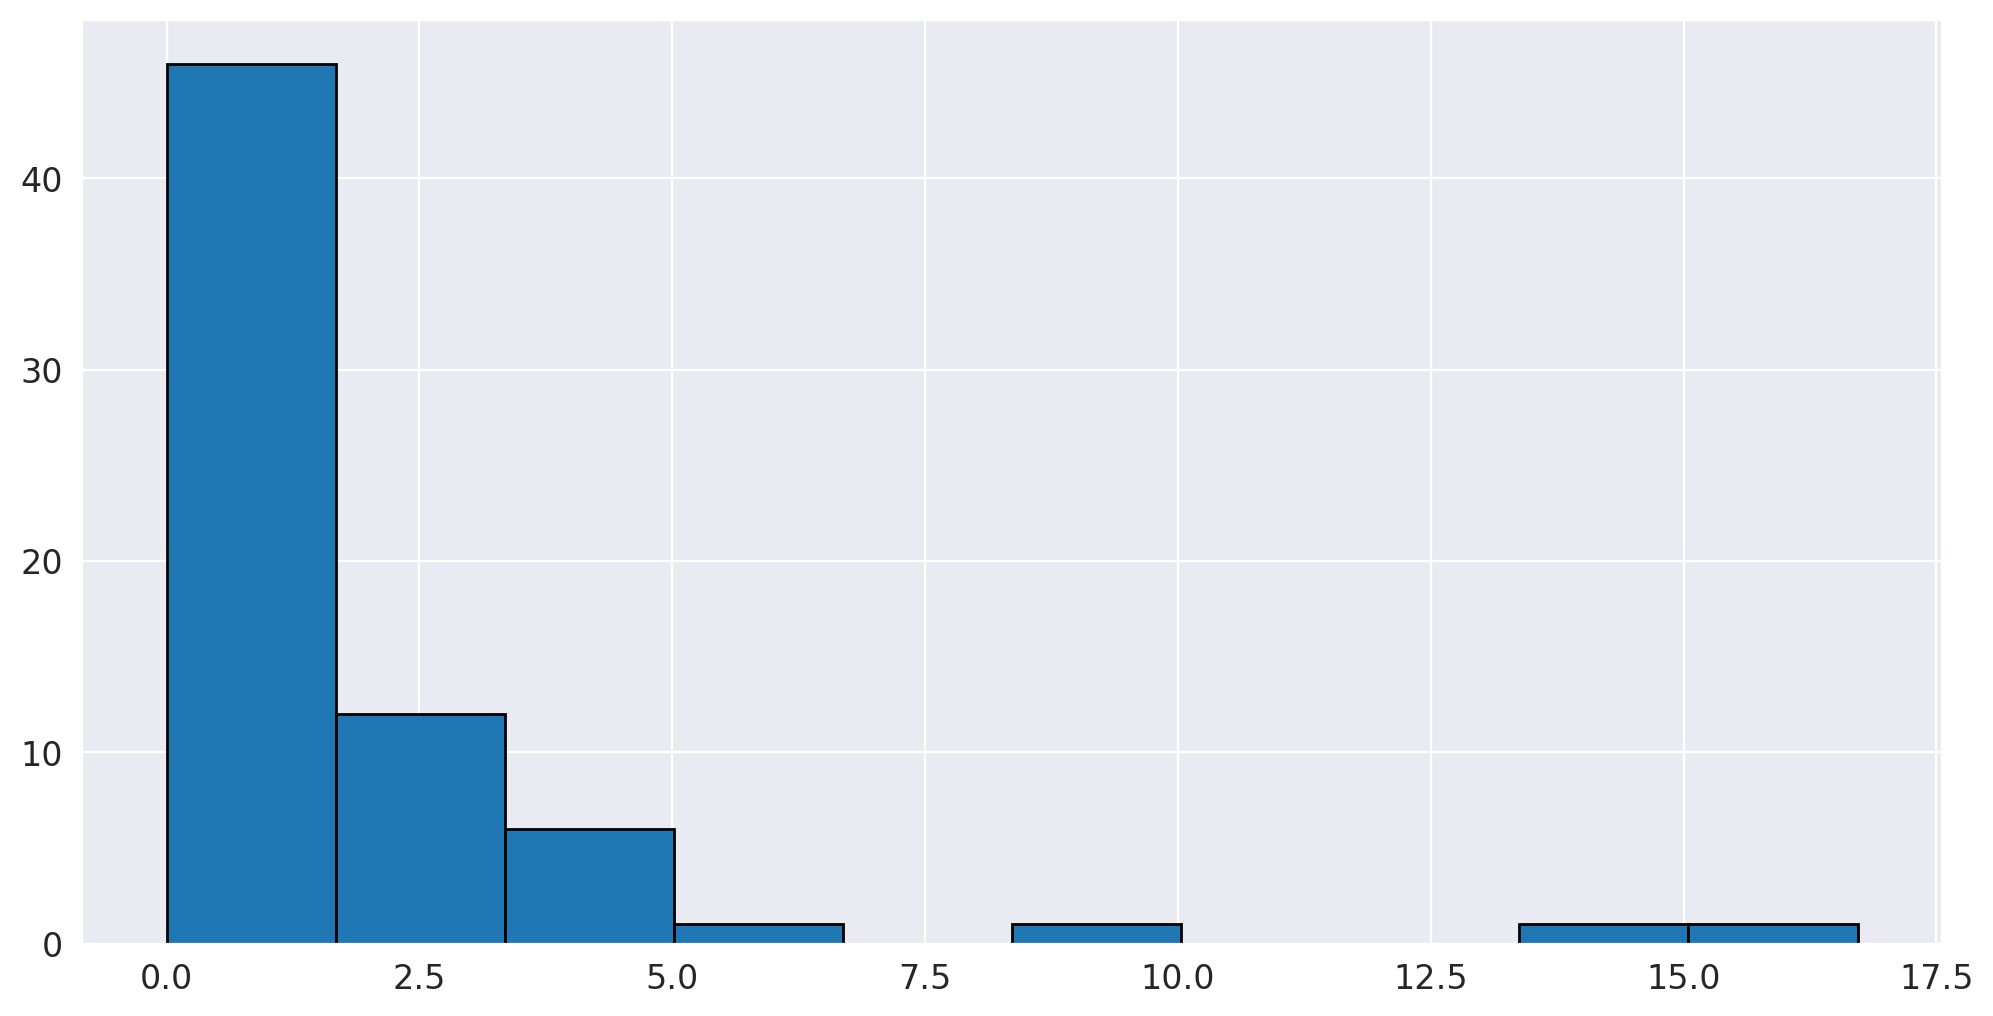

In [ ]:
df_Kill_Bill_2 = df_word[df_word['movie']=='Kill Bill: Vol. 2']
intervals_time = np.diff(df_Kill_Bill_2['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');

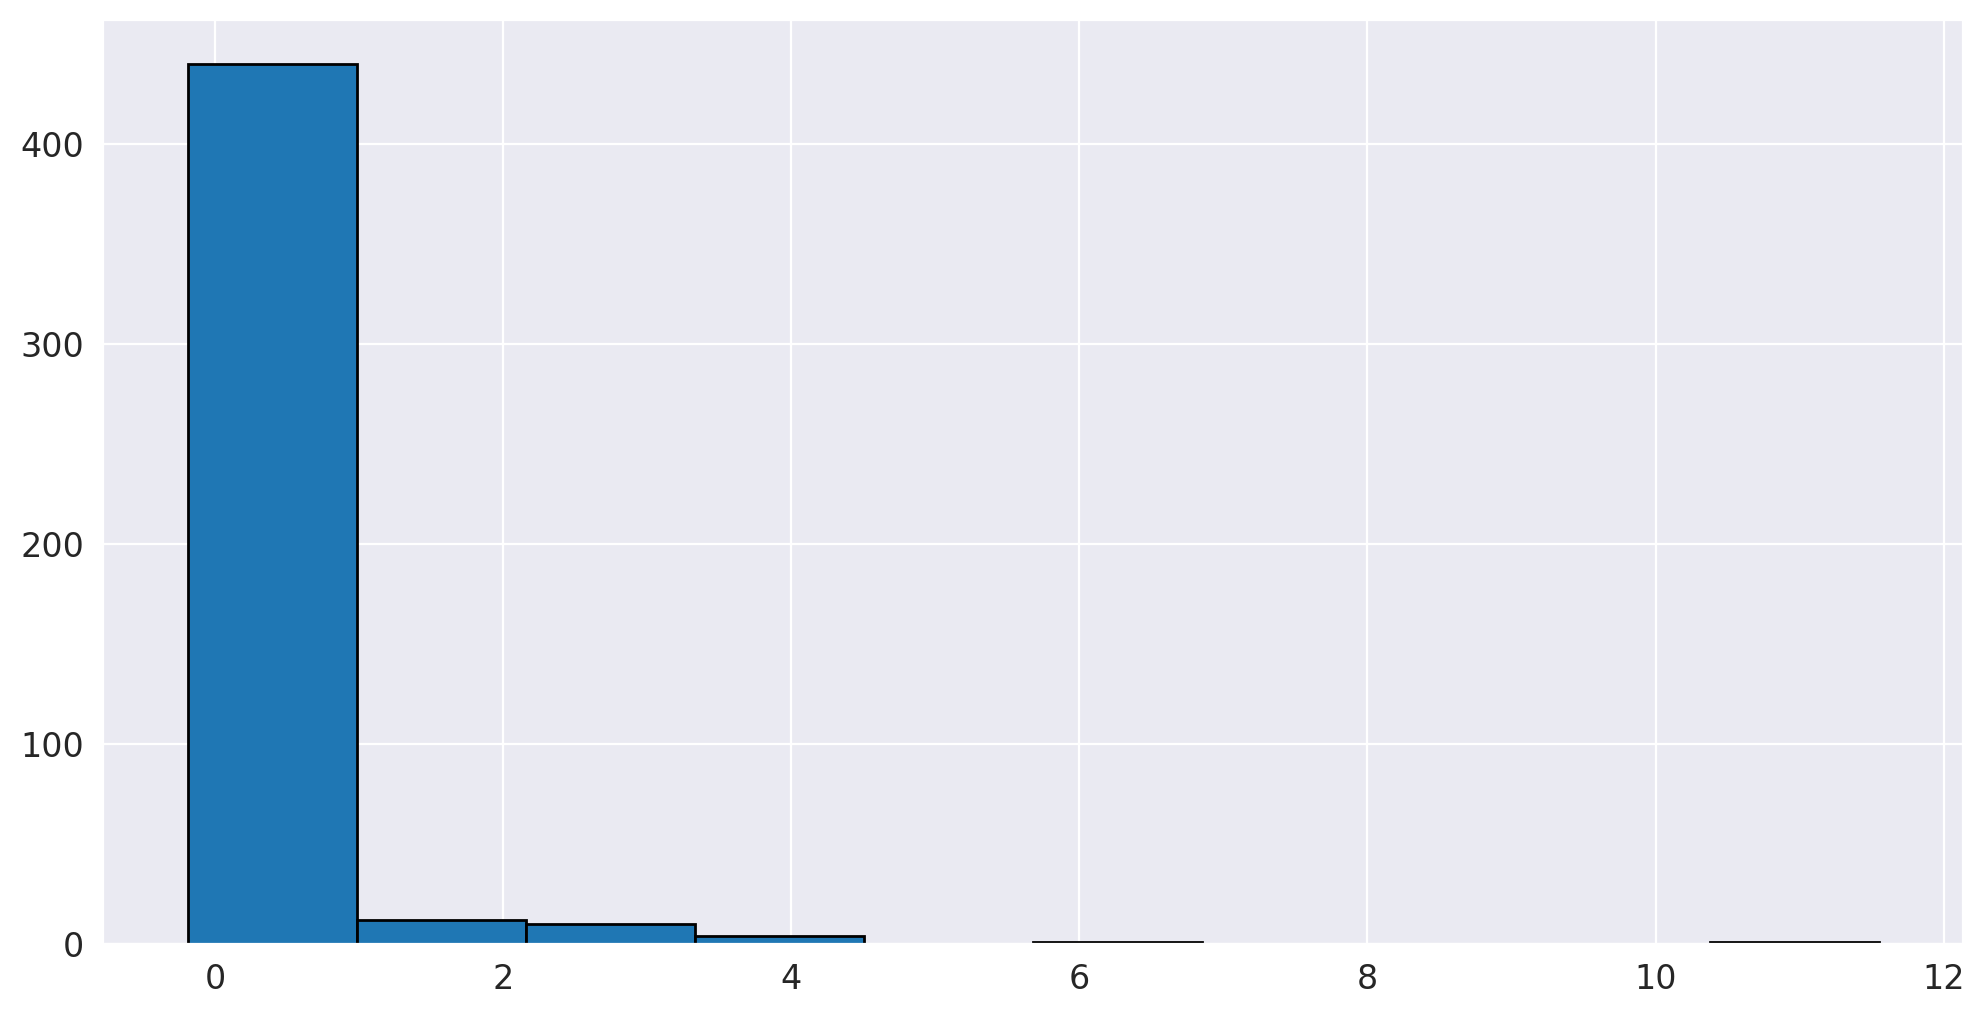

In [ ]:
df_Pulp_Fiction = df_word[df_word['movie']=='Pulp Fiction']
intervals_time = np.diff(df_Pulp_Fiction['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');

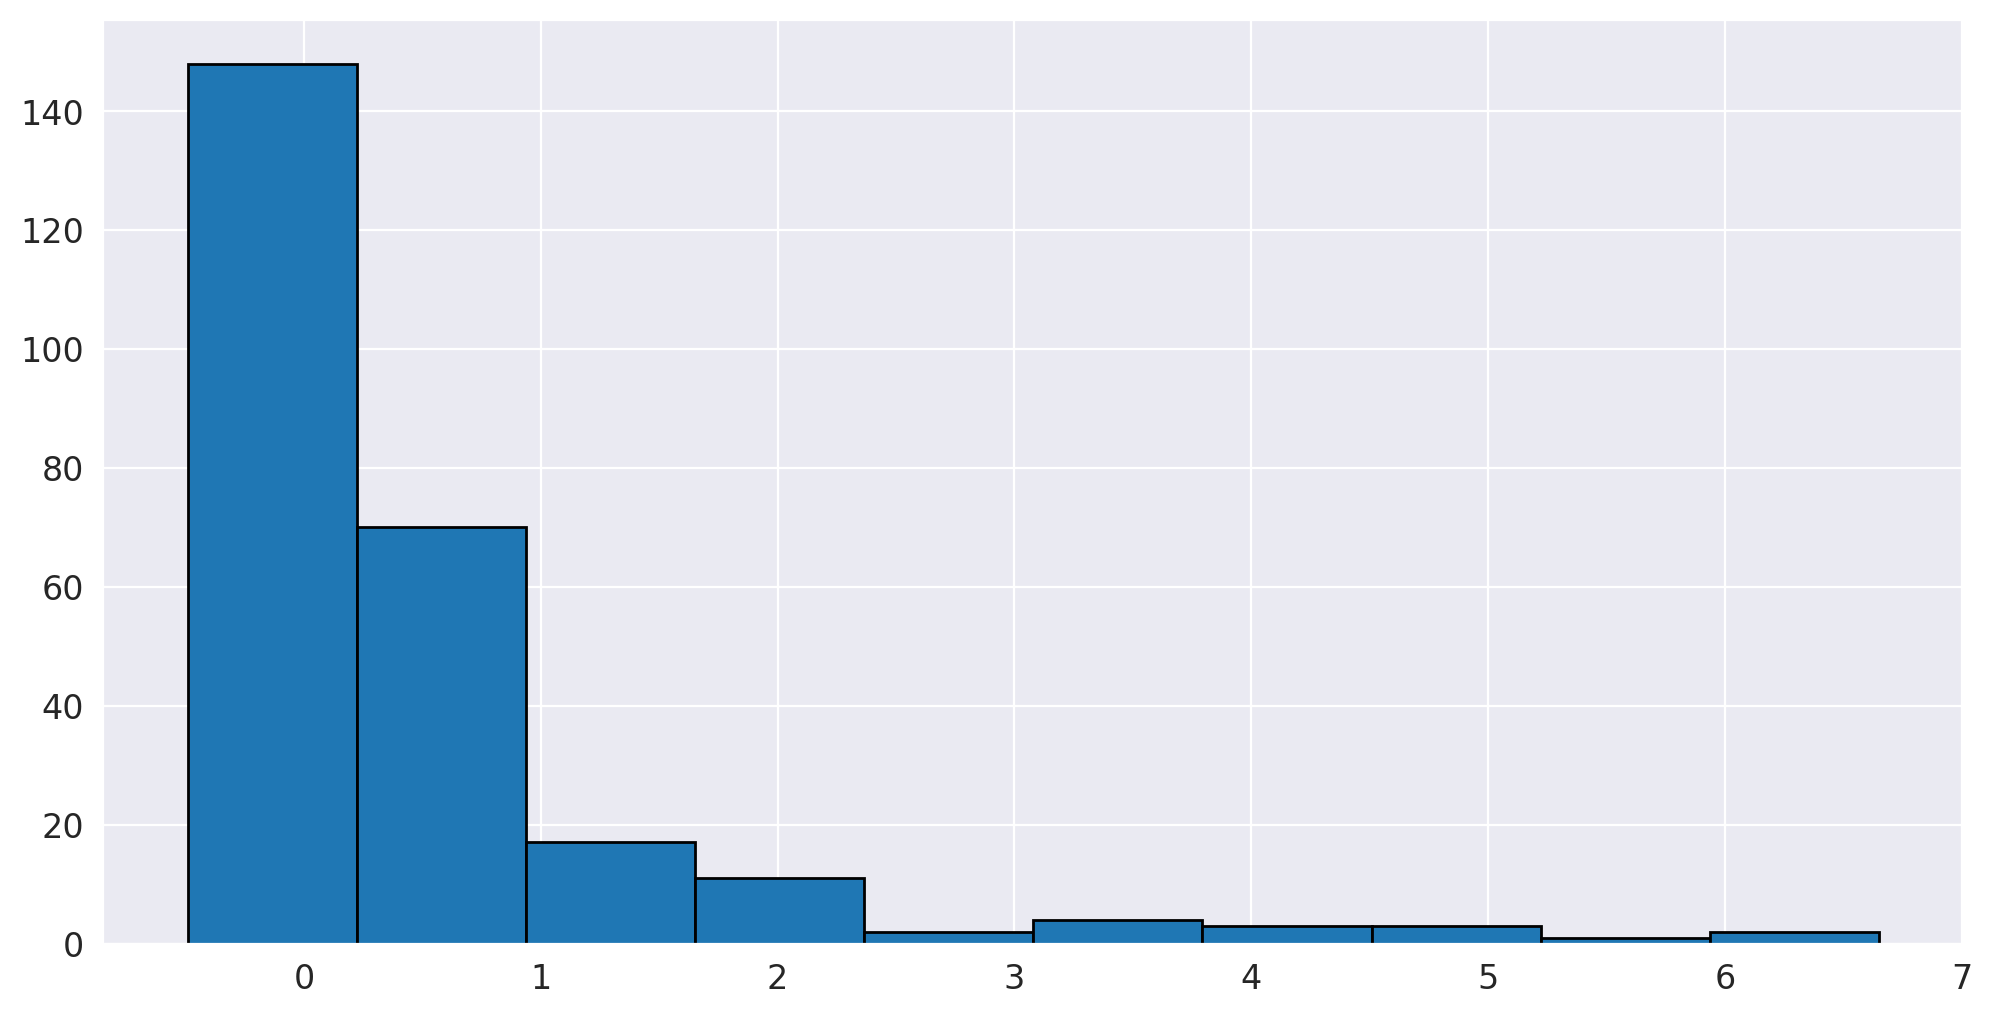

In [ ]:
df_Django_Unchained = df_word[df_word['movie']=='Django Unchained']
intervals_time = np.diff(df_Django_Unchained['minutes_in'])

# Визуализация распределения интервалов времени
plt.hist(intervals_time, edgecolor='black');